# Importing Required Libraries for Data Preparation 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset and Examining Structure

In [3]:
df = pd.read_csv('data/gritdata.csv', delimiter = '\t')
df.head()
# changed delimiter to tab

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,O7,O8,O9,O10,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,1,1,3,3,3,2,3,1,...,5,4,5,4,Windows,Chrome,1366,768,69590,307
1,US,120,2,2,3,3,2,1,3,3,...,4,3,4,5,Macintosh,Chrome,1280,800,33657,134
2,US,99,3,3,3,3,4,3,4,4,...,5,5,4,4,Windows,Firefox,1920,1080,95550,138
3,KE,5098,1,3,4,2,4,1,5,4,...,4,2,5,4,Windows,Chrome,1600,900,4,4440
4,JP,340,1,2,3,3,2,2,2,4,...,4,1,3,2,Windows,Firefox,1920,1080,3,337


In [4]:
df.shape
# (row, col)

(4270, 98)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 98 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          4226 non-null   object
 1   surveyelapse     4270 non-null   int64 
 2   GS1              4270 non-null   int64 
 3   GS2              4270 non-null   int64 
 4   GS3              4270 non-null   int64 
 5   GS4              4270 non-null   int64 
 6   GS5              4270 non-null   int64 
 7   GS6              4270 non-null   int64 
 8   GS7              4270 non-null   int64 
 9   GS8              4270 non-null   int64 
 10  GS9              4270 non-null   int64 
 11  GS10             4270 non-null   int64 
 12  GS11             4270 non-null   int64 
 13  GS12             4270 non-null   int64 
 14  VCL1             4270 non-null   int64 
 15  VCL2             4270 non-null   int64 
 16  VCL3             4270 non-null   int64 
 17  VCL4             4270 non-null   

## Validity Check + Filtering

In [6]:
df = df[~((df["VCL6"]==1) | (df["VCL9"]==1) | (df["VCL12"]==1))]
# filtering out rows that are true (value == 1) in cols: VCL6, VCL9, VCL12

The validity check has been performed and the VCL columns are no longer required. I will remove them VCL6, VCL9, VCL12 but keep the rest just in case good vocabulary is an indicator of grit.

In [7]:
df = df.drop(columns = ["VCL6", "VCL9", "VCL12"])

### Filtering Survey Timing Data
Removing rows with unreasonable survey completion times:
- testelapse: 75-2000 seconds (too fast indicates careless responding, too slow indicates interruptions)
- introelapse: 0-800 seconds 
- surveyelapse: 72-2000 seconds

In [8]:
# Check how many rows fall outside acceptable timing ranges
print("Rows outside bounds:")
print(f"75 < testelapse < 2000: {((df['testelapse'] < 75) | (df['testelapse'] > 2000)).sum()}")
print(f"0 < introelapse < 800: {((df['introelapse'] < 0) | (df['introelapse'] > 800)).sum()}")
print(f"72 < surveyelapse < 2000: {((df['surveyelapse'] < 72) | (df['surveyelapse'] > 2000)).sum()}")
print(f"\nCurrent shape: {df.shape}")

Rows outside bounds:
75 < testelapse < 2000: 42
0 < introelapse < 800: 114
72 < surveyelapse < 2000: 16

Current shape: (3162, 95)


In [9]:
# Filter rows based on timing bounds
df = df[(df['testelapse'] >= 75) & (df['testelapse'] <= 2000) &
        (df['introelapse'] >= 0) & (df['introelapse'] <= 800) &
        (df['surveyelapse'] >= 72) & (df['surveyelapse'] <= 2000)]

In [10]:
# Verify filtering results
print(f"New shape after timing filter: {df.shape}")
print(f"\nUpdated timing statistics:")
print(df[["introelapse", "testelapse", "surveyelapse"]].describe())

New shape after timing filter: (3003, 95)

Updated timing statistics:
       introelapse   testelapse  surveyelapse
count  3003.000000  3003.000000   3003.000000
mean     38.064269   267.752248    232.262071
std      89.487635   173.386255    147.288365
min       1.000000    77.000000     72.000000
25%       5.000000   170.000000    148.000000
50%      10.000000   221.000000    194.000000
75%      28.000000   299.500000    262.000000
max     784.000000  1819.000000   1991.000000


In [11]:
df.duplicated().sum()

0

In [12]:
print(df['country'].unique())

['JP' 'US' 'EU' 'NZ' 'AE' 'AU' 'MY' 'FI' 'NO' 'PK' 'GB' 'CZ' 'IN' 'RO'
 'SG' 'BG' 'BH' 'CA' 'PH' 'ZA' 'SE' 'DK' 'IT' 'AR' 'EG' 'LU' 'KE' 'HK'
 'PL' 'TR' 'BR' 'CO' 'GH' 'NL' 'FR' 'GR' 'EE' 'ES' 'UA' 'MM' nan 'IE' 'DE'
 'MA' 'IL' 'HU' 'MX' 'PR' 'ID' 'HR' 'KR' 'NI' 'CN' 'LK' 'RU' 'JM' 'BZ'
 'LT' 'MC' 'IS' 'BE' 'PT' 'DZ' 'SI' 'UG' 'TH' 'BS' 'VN' 'A1' 'TW' 'SA'
 'TN' 'DO' 'AT' 'CR' 'CH' 'KW' 'TT' 'CL' 'BA' 'AL' 'SK' 'BN' 'JO' 'BD'
 'KH' 'SD' 'ZW' 'CY' 'NG' 'BB' 'SY' 'LV' 'ML' 'TZ' 'RS' 'SV' 'IR' 'MT'
 'NP' 'QA' 'BW' 'HN' 'GE' 'LB' 'GT']


There are no duplicates in our data.

In [13]:
df.isna().sum()

country         31
surveyelapse     0
GS1              0
GS2              0
GS3              0
                ..
browser          0
screenw          0
screenh          0
introelapse      0
testelapse       0
Length: 95, dtype: int64

44 rows in the data have null values in the column "country". We will fill these null values with a placeholder value, "Unknown" so we can retain other information.

In [14]:
df['country'] = df['country'].fillna("Unknown")
# fill missing country values with "Unknown"

In [15]:
df.isna().sum().sum()
# checking if there are any remaining null values 

0

In [16]:
# this demographics dataframe DOES NOT include familysize and age since its information 
# was collected differently by the user
demographics = ["education", "urban", "gender", "engnat", "hand", "religion", "orientation", 
"race", "voted", "married","country"]
demographics_df = df[demographics]
demographicZeroCount = (demographics_df == 0).sum()
print(demographicZeroCount)

education      23
urban          28
gender          3
engnat         16
hand           10
religion       43
orientation    89
race           21
voted          25
married        16
country         0
dtype: int64


A value marked 0 will be considered 'Unknown'.

<Axes: xlabel='age'>

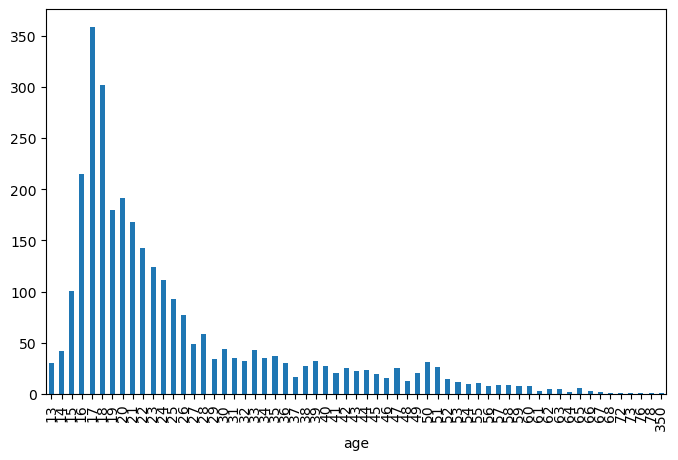

In [17]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

Here with our age column, we find two outliers, users who inserted their ages as 228 and 350. We will remove those rows.

In [18]:
df = df[~((df["age"]==228) | (df["age"]==350))]

<Axes: xlabel='age'>

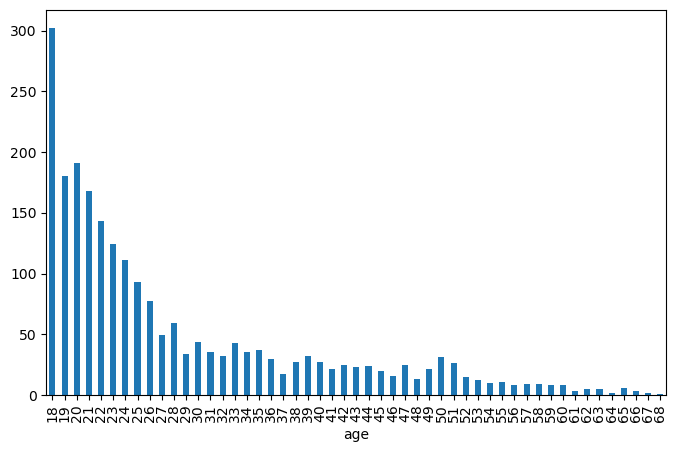

In [19]:
#remove rows below age 18
df.drop(df[df['age'] < 18].index, inplace=True)
#remove rows above 70
df.drop(df[df['age'] > 70].index, inplace=True)

#after dropping 
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='familysize'>

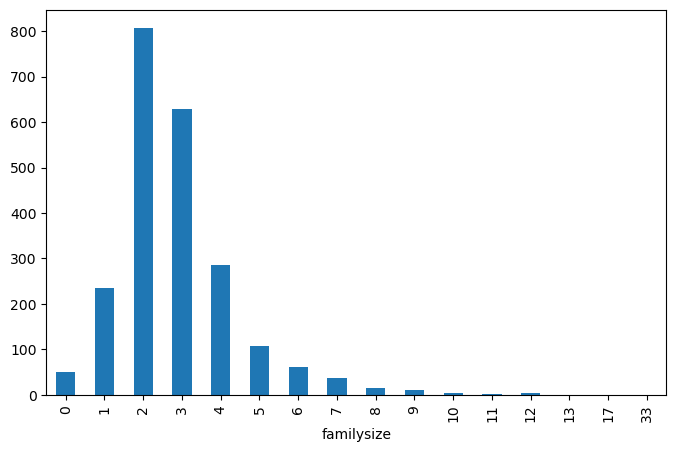

In [20]:
df['familysize'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

Here with our familysize column, we find a couple of outliers. Like the age column, we will remove those outlier rows.

In [21]:
df = df[~((df["familysize"]==0) | (df["familysize"]==123334444) | (df["familysize"]==33))]

In [22]:
# getting the columns of gritScore cols (GS1-GS12)
gritColumns = df.iloc[:,2:14].columns
print(gritColumns)

Index(['GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10',
       'GS11', 'GS12'],
      dtype='object')


In [23]:
# summing up the count of all missing data from Grit Scores
GritScoreZeroCount = (df[gritColumns] == 0).sum()
print(GritScoreZeroCount)

GS1      6
GS2      6
GS3      7
GS4     15
GS5      7
GS6      9
GS7      9
GS8      5
GS9      5
GS10     6
GS11     5
GS12    12
dtype: int64


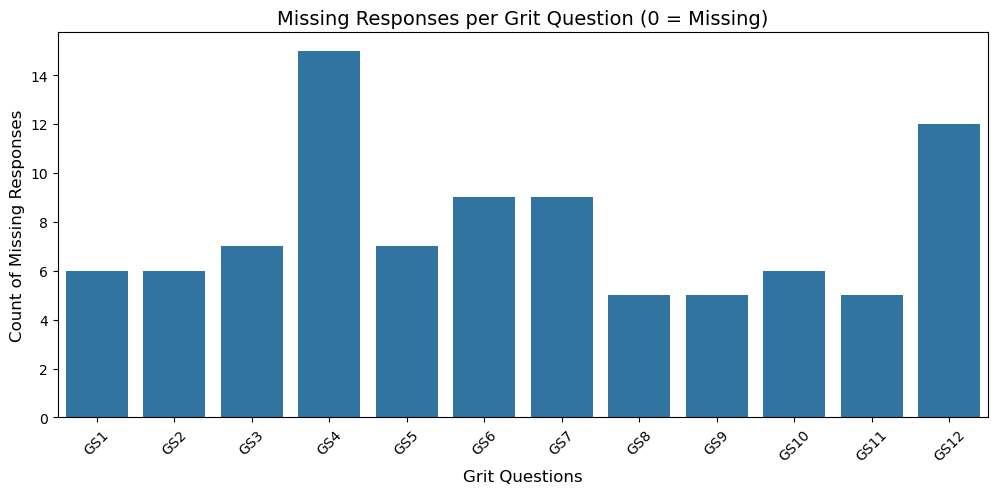

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x=GritScoreZeroCount.index, y=GritScoreZeroCount.values)
plt.title("Missing Responses per Grit Question (0 = Missing)", fontsize=14)
plt.xlabel("Grit Questions", fontsize=12)
plt.ylabel("Count of Missing Responses", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Thesee are the amount of missing grit scores

In [25]:
# getting the columns of the Big 5 Personality Test 
bigPersonalities = [col for col in df.columns if col.startswith(("E", "N", "A", "C", "O"))]
print(bigPersonalities)
#columns=[col for col in df.columns if col.startswith("VCL")]

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10']


In [26]:
# summing up the count of all missing data from Big 5 Personality Test
bigPersonalitiesZeroCount = (df[bigPersonalities] == 0).sum()
print(bigPersonalitiesZeroCount)

E1      6
E2      5
E3      5
E4      7
E5      9
E6      4
E7     15
E8      3
E9      3
E10     3
N1      4
N2      8
N3      6
N4      9
N5      4
N6      9
N7      8
N8      7
N9      4
N10     9
A1      8
A2      6
A3      7
A4      7
A5      7
A6      9
A7      3
A8      4
A9      3
A10     9
C1      7
C2      6
C3      4
C4      8
C5      8
C6      8
C7      6
C8      9
C9      7
C10     8
O1      3
O2      9
O3      9
O4      8
O5      7
O6     10
O7      6
O8      5
O9      6
O10     9
dtype: int64


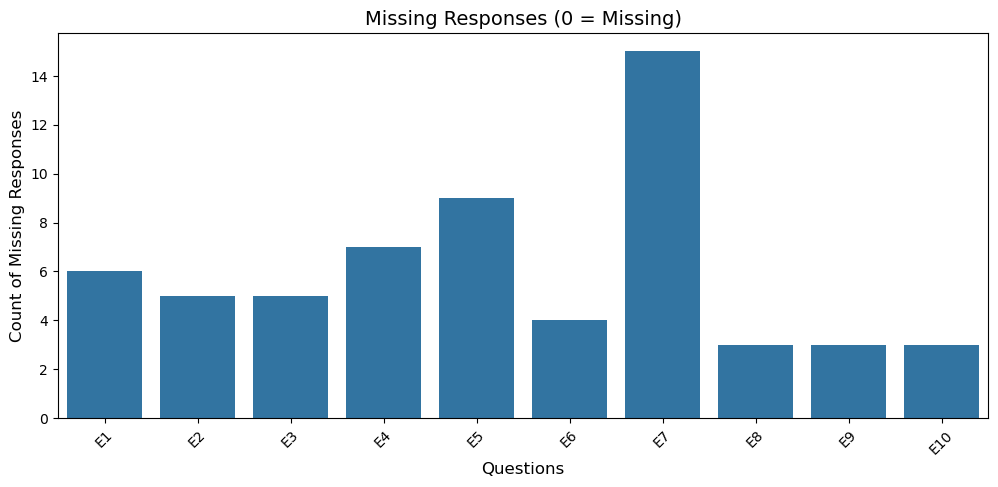

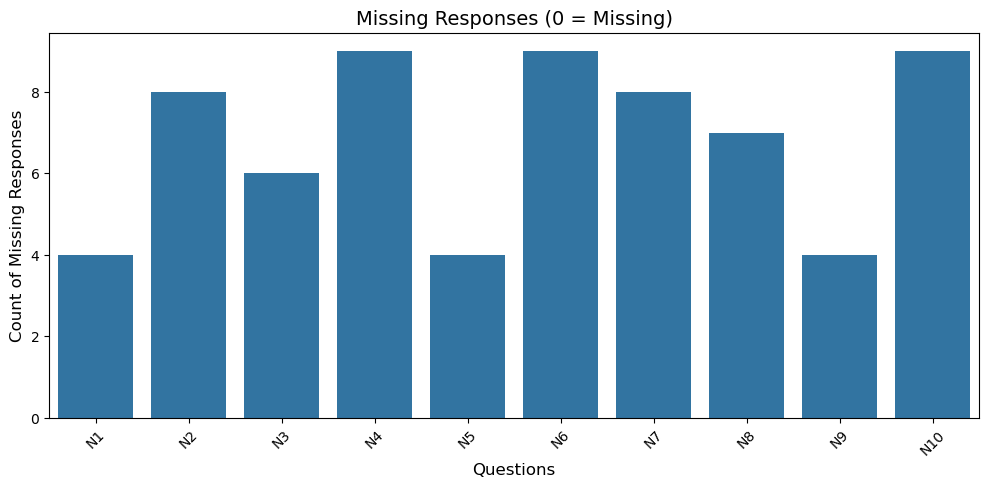

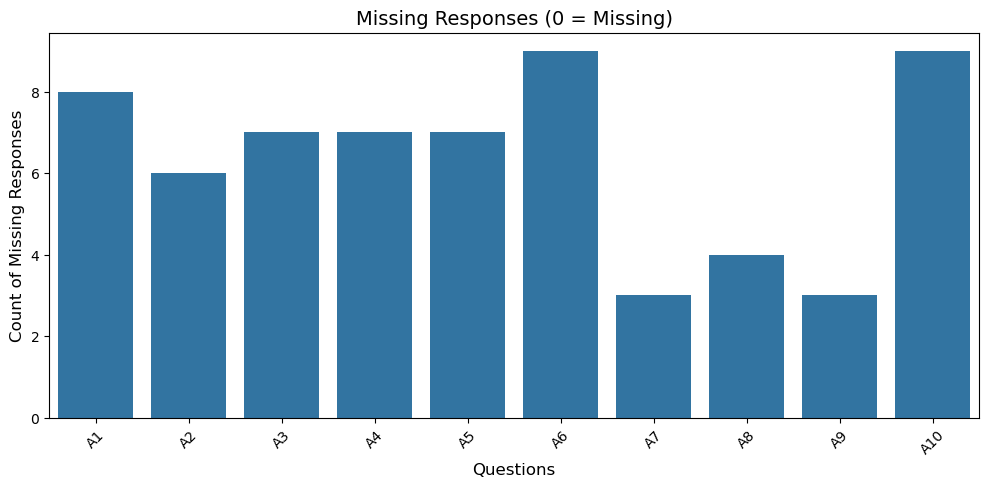

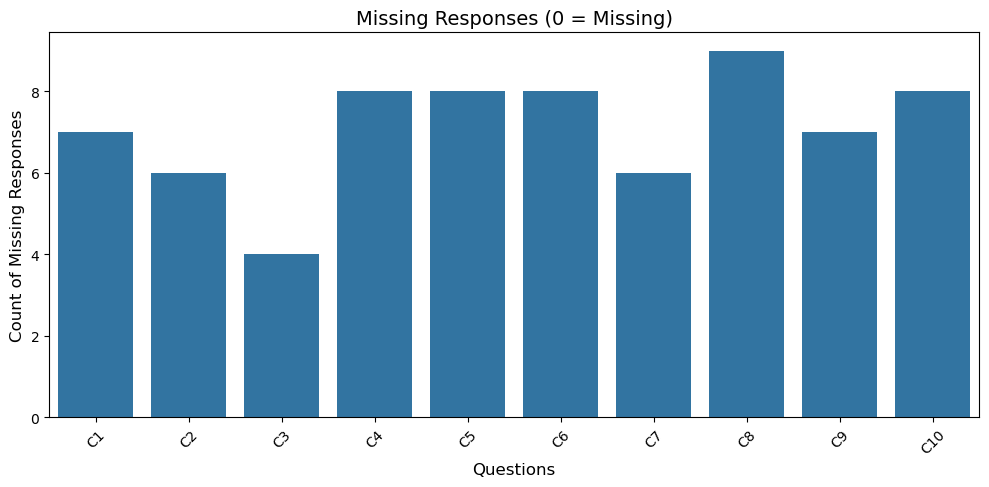

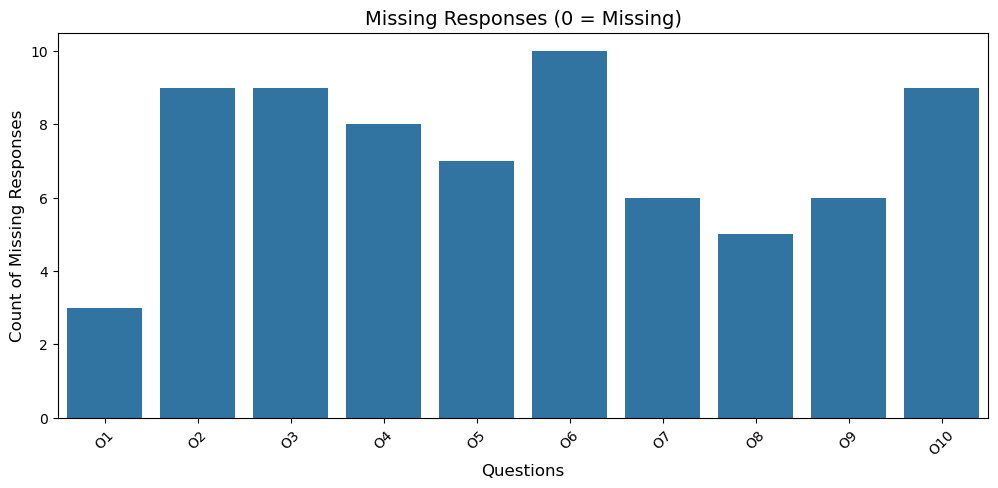

In [27]:
for i in range(0, 50, 10):
    current = bigPersonalitiesZeroCount.iloc[i: i+10]
    plt.figure(figsize=(12,5))
    sns.barplot(x=current.index, y=current.values)
    plt.title("Missing Responses (0 = Missing)", fontsize=14)
    plt.xlabel("Questions", fontsize=12)
    plt.ylabel("Count of Missing Responses", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

## Completeness Check 

In [28]:
completeness = (df != 0).sum() / (len(df))

completeness_df = pd.DataFrame({
    'BigPersonalities': bigPersonalitiesZeroCount,
    'GritScore': GritScoreZeroCount, 
    'MissingCountries': (df['country'] == 'Unknown').sum(),
    'NonMissingCounts': (df != 0).sum(),
    'CompletenessRate': completeness.round(3)
})

In [29]:
completeness_df[completeness_df['GritScore'].notna()]

,BigPersonalities,GritScore,MissingCountries,NonMissingCounts,CompletenessRate
GS1,NaN,6.0,25,2194,0.997
GS10,NaN,6.0,25,2194,0.997
GS11,NaN,5.0,25,2195,0.998
GS12,NaN,12.0,25,2188,0.995
GS2,NaN,6.0,25,2194,0.997
GS3,NaN,7.0,25,2193,0.997
GS4,NaN,15.0,25,2185,0.993
GS5,NaN,7.0,25,2193,0.997
GS6,NaN,9.0,25,2191,0.996
GS7,NaN,9.0,25,2191,0.996


### Filling in zero values with median values within that column and we are not using mean to avoid outliers

In [30]:
print(int(df['GS1'].median()))

2


In [31]:
for i in GritScoreZeroCount.index:
    value = int(df[i].median())
    df[i] = df[i].replace(0, value)

In [32]:
GritScoreZeroCount = (df[gritColumns] == 0).sum()
print(GritScoreZeroCount)

GS1     0
GS2     0
GS3     0
GS4     0
GS5     0
GS6     0
GS7     0
GS8     0
GS9     0
GS10    0
GS11    0
GS12    0
dtype: int64


In [33]:
for i in bigPersonalitiesZeroCount.index:
    value = int(df[i].median())
    df[i] = df[i].replace(0, value)

In [34]:
bigPersonalitiesZeroCount = (df[bigPersonalities] == 0).sum()
print(bigPersonalitiesZeroCount)

E1     0
E2     0
E3     0
E4     0
E5     0
E6     0
E7     0
E8     0
E9     0
E10    0
N1     0
N2     0
N3     0
N4     0
N5     0
N6     0
N7     0
N8     0
N9     0
N10    0
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
O1     0
O2     0
O3     0
O4     0
O5     0
O6     0
O7     0
O8     0
O9     0
O10    0
dtype: int64


In [35]:
print(df["operatingsystem"].value_counts())
print(df["browser"].value_counts())
print(df[["screenw", "screenh"]].describe())
print(df[["introelapse", "testelapse", "surveyelapse"]].describe())

operatingsystem
Windows          1380
Macintosh         333
iOS               242
Linux             206
ChromeOS           23
Unknown            13
Windows Phone       2
Blackberry          1
Name: count, dtype: int64
browser
Chrome                         1162
Safari                          368
Microsoft Internet Explorer     292
Firefox                         289
AndroidBrowser                   30
Opera                            23
Unknown                          19
ChromeiOS                        15
SeaMonkey                         1
UCBrowser                         1
Name: count, dtype: int64
           screenw      screenh
count  2200.000000  2200.000000
mean   1260.459545   842.192727
std     450.718957   178.941499
min       0.000000     0.000000
25%    1139.500000   768.000000
50%    1366.000000   800.000000
75%    1440.000000   983.250000
max    3440.000000  1920.000000
       introelapse   testelapse  surveyelapse
count  2200.000000  2200.000000   2200.000000
mean    

Since there are missing values in screenw and screenh and the two are unlikely to be strong predictors, I will remove the columns. I will also be removing rows with unreasonable timings.

In [36]:
df = df.drop(columns = ["screenw", "screenh"])

(array([5.300e+01, 1.075e+03, 6.330e+02, 2.330e+02, 9.300e+01, 4.500e+01,
        2.900e+01, 1.400e+01, 8.000e+00, 8.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
        3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
        4500., 4600.,

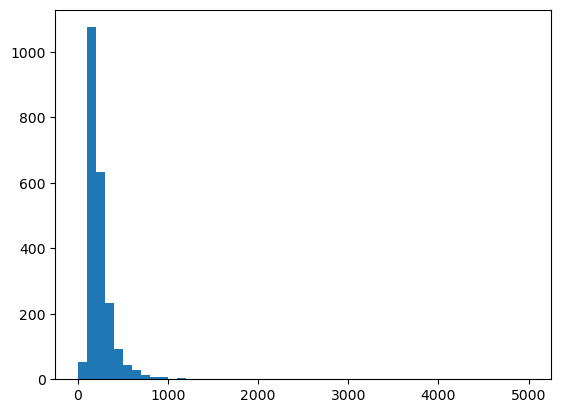

In [37]:
plt.hist(df["surveyelapse"], bins=50, range=(0,5000)) 

(array([1.428e+03, 2.990e+02, 1.450e+02, 7.300e+01, 4.800e+01, 3.400e+01,
        2.200e+01, 1.700e+01, 1.500e+01, 1.500e+01, 1.000e+01, 9.000e+00,
        4.000e+00, 9.000e+00, 9.000e+00, 8.000e+00, 6.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,

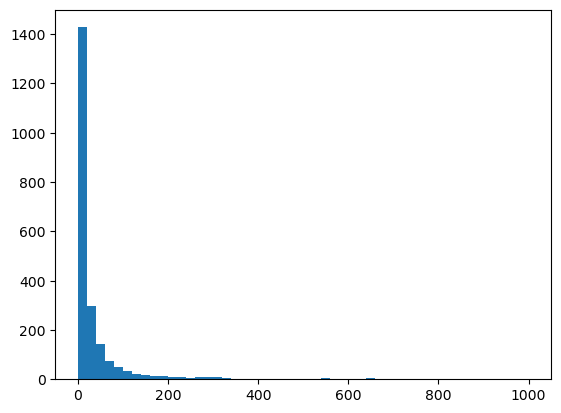

In [38]:
plt.hist(df["introelapse"], bins=50, range=(0,1000)) 

(array([  0.,   1.,  70., 355., 448., 378., 270., 172., 129.,  85.,  60.,
         37.,  29.,  33.,  27.,  19.,  13.,  12.,   6.,   8.,   5.,   4.,
          4.,   6.,   2.,   2.,   3.,   0.,   4.,   0.,   1.,   0.,   3.,
          3.,   2.,   1.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560., 1600., 1640., 1680., 1720., 1760.,
        1800., 1840., 1880., 1920., 1960., 2000.]),
 <BarContainer object of 50 artists>)

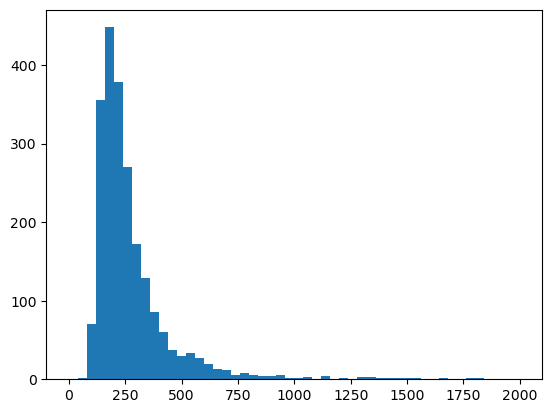

In [39]:
plt.hist(df["testelapse"], bins=50, range=(0,2000)) 

Will decide on the timing thing later with the help of others. Unsure what to do. Lots of unreasonably long times for all three but usure of cutoff. Seems to be some unreasonably short times for testelapes such as 7 seconds for 50 questions. Also unsure of a cutoff for this.

Will reverse the scores of negatively worded survey questions and then create columns for composite personality and grit scores.

In [40]:
reverse_items = ["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6", "GS1", "GS4", "GS6", "GS9", "GS10", "GS12"]
df[reverse_items] = 6 - df[reverse_items]

In [41]:
extraversion_items = ["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10"]
neuroticism_items = ["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
agreeableness_items = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10"]
conscientious_items = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"]
openness_items = ["O1","O2","O3","O4","O5","O6","O7","O8","O9","O10"]
grit_items = ["GS1", "GS2", "GS3", "GS4", "GS5", "GS6", "GS7", "GS8", "GS9", "GS10", "GS11", "GS12"]

df["Extraversion"] = df[extraversion_items].mean(axis=1)
df["Neuroticism"] = df[neuroticism_items].mean(axis=1)
df["Agreeableness"] = df[agreeableness_items].mean(axis=1)
df["Conscientiousness"] = df[conscientious_items].mean(axis=1)
df["Openness"] = df[openness_items].mean(axis=1)
df["Grit"] = df[grit_items].mean(axis=1)

In [42]:
df.shape

(2200, 99)

Next I will explore the distribution of the grit items

In [43]:
print(df[gritColumns].describe())

               GS1          GS2          GS3          GS4          GS5  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      3.881364     2.503636     2.954091     3.195000     2.829545   
std       0.992476     1.122341     1.215775     1.163204     1.270772   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     2.000000     2.000000     2.000000     2.000000   
50%       4.000000     2.000000     3.000000     3.000000     3.000000   
75%       5.000000     3.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

               GS6          GS7          GS8          GS9         GS10  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      4.098182     3.058636     3.014091     3.526818     3.486364   
std       1.033938     1.189891     1.291974     1.128896     1.312062   
min       1.000000     1.000000     1

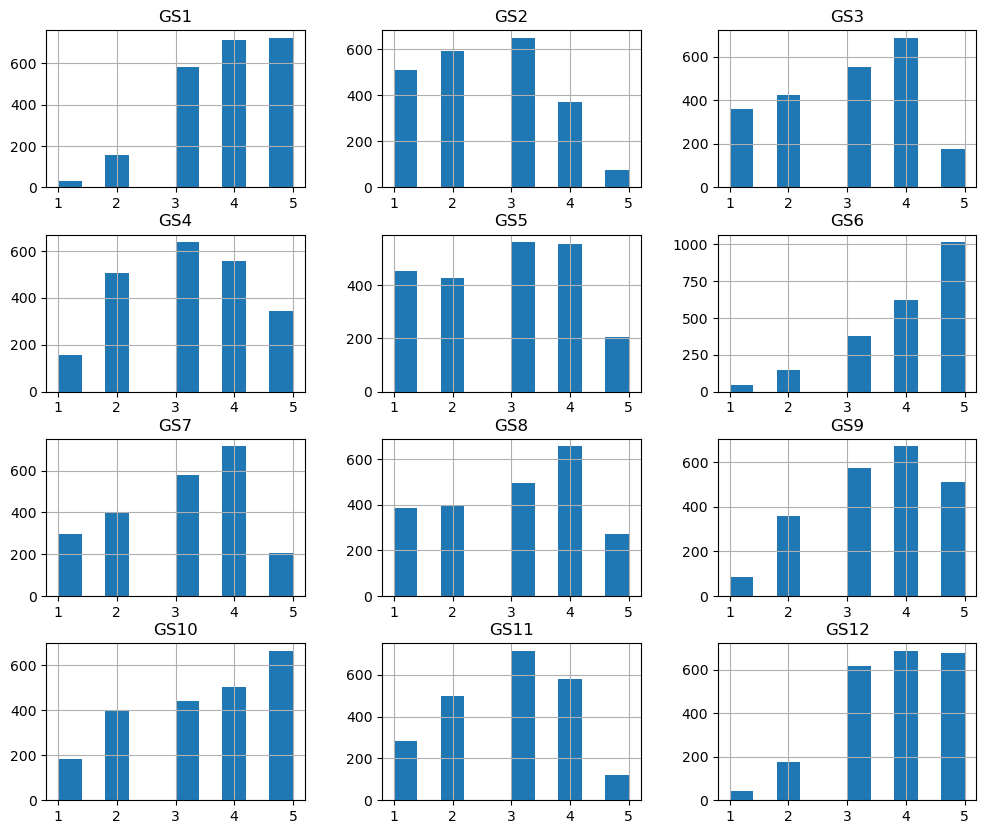

In [44]:
df[gritColumns].hist(figsize=(12,10))
plt.show()

I will now take a look at the distribution of the overall grit score.

count    2200.000000
mean        3.270568
std         0.697635
min         1.083333
25%         2.750000
50%         3.333333
75%         3.833333
max         5.000000
Name: Grit, dtype: float64


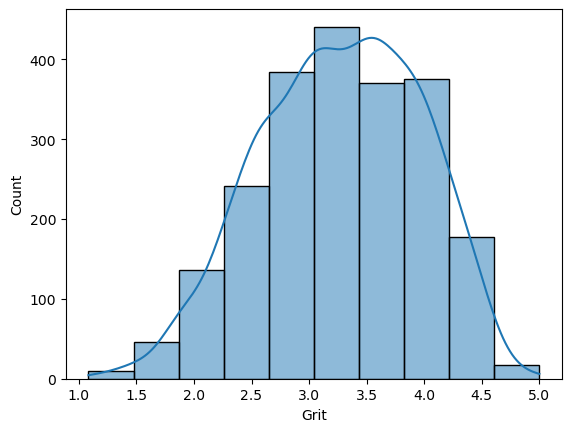

In [45]:
print(df["Grit"].describe())
sns.histplot(df["Grit"], kde=True, bins=10)
plt.show()

The overall grit score seems to follow a normal distribution. There are no floor/ceiling effects.

I will now do the same for the big five personality test.

In [46]:
print(df[bigPersonalities].describe())

                E1           E2           E3           E4           E5  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      2.688636     3.257727     3.323182     2.880000     3.354091   
std       1.249232     1.330181     1.182950     1.206757     1.212929   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     3.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                E6           E7           E8           E9          E10  ...  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000  ...   
mean      3.589091     2.784091     2.623636     2.945455     2.436818  ...   
std       1.216930     1.368529     1.250079     1.320675     1.272942  ...   
min       1.00000

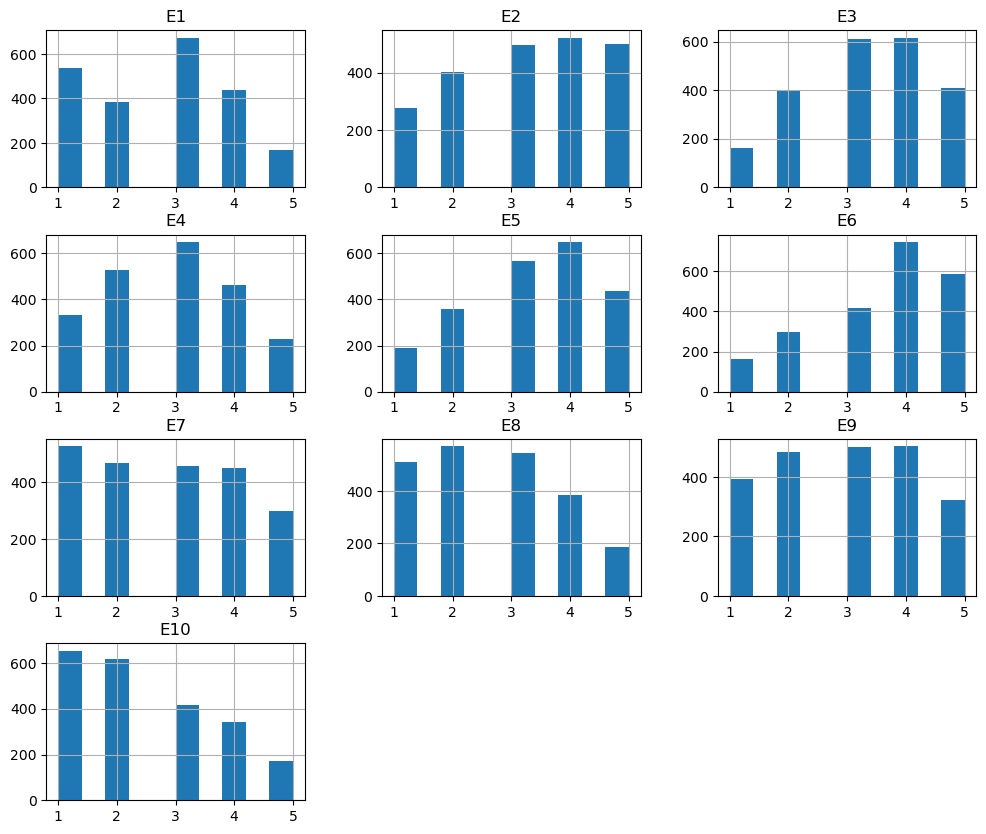

In [47]:
df[extraversion_items].hist(figsize=(12,10))
plt.show()

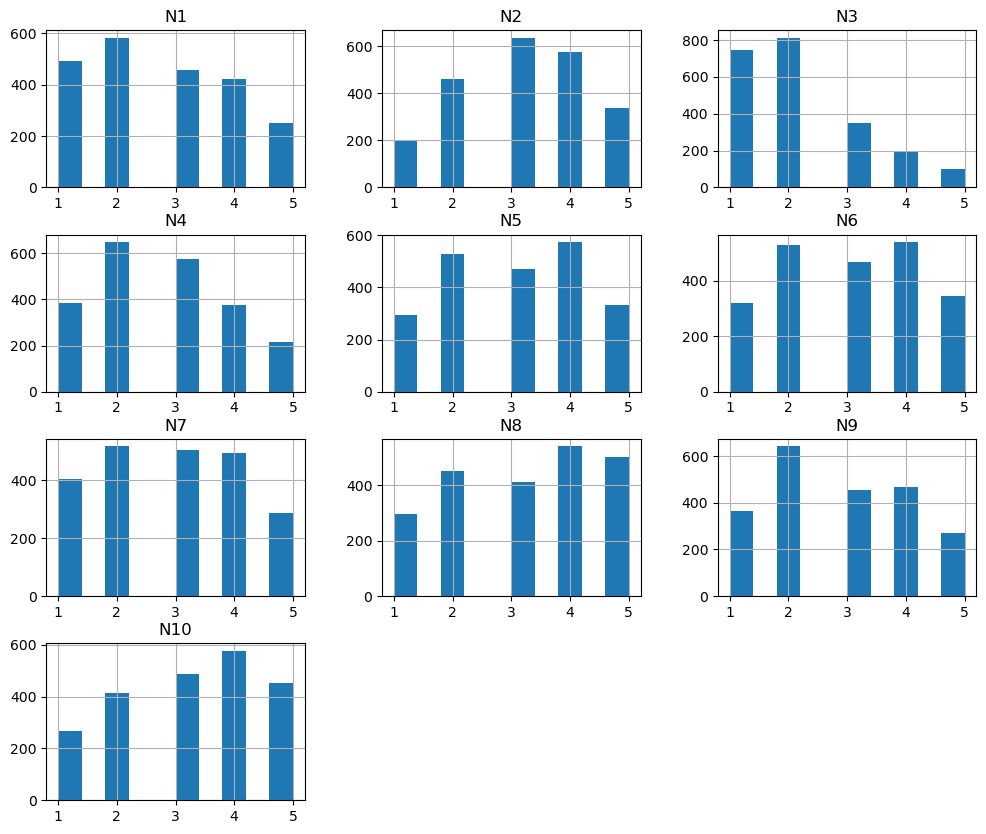

In [48]:
df[neuroticism_items].hist(figsize=(12,10))
plt.show()

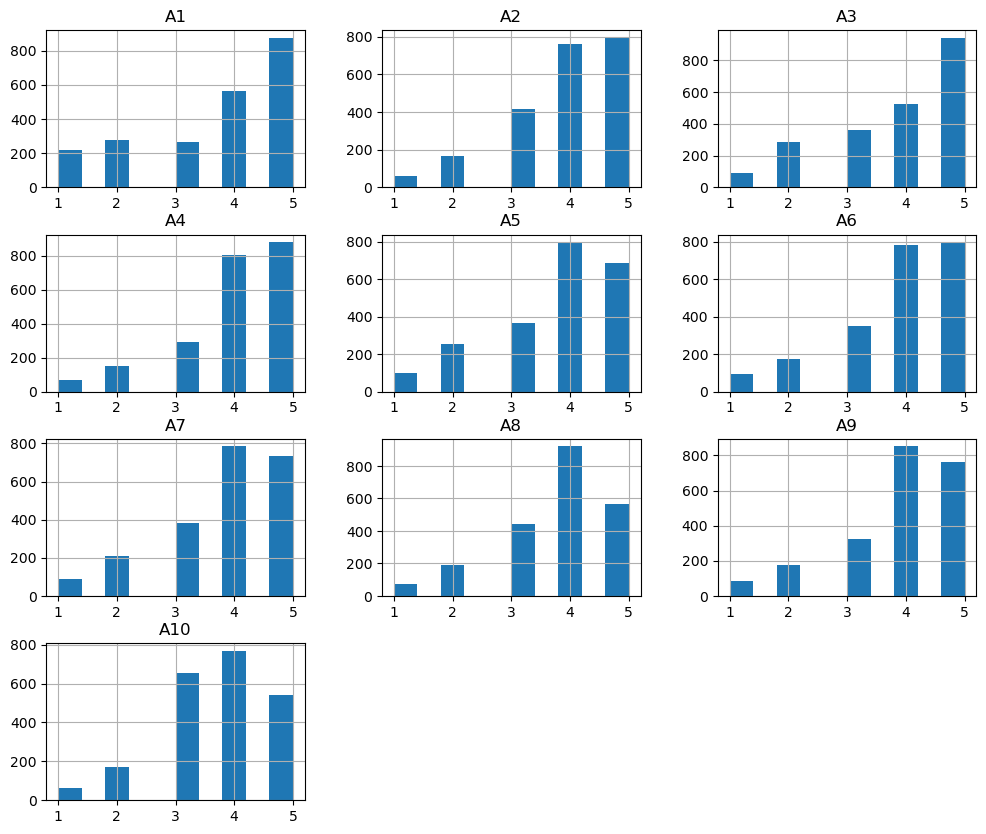

In [49]:
df[agreeableness_items].hist(figsize=(12,10))
plt.show()

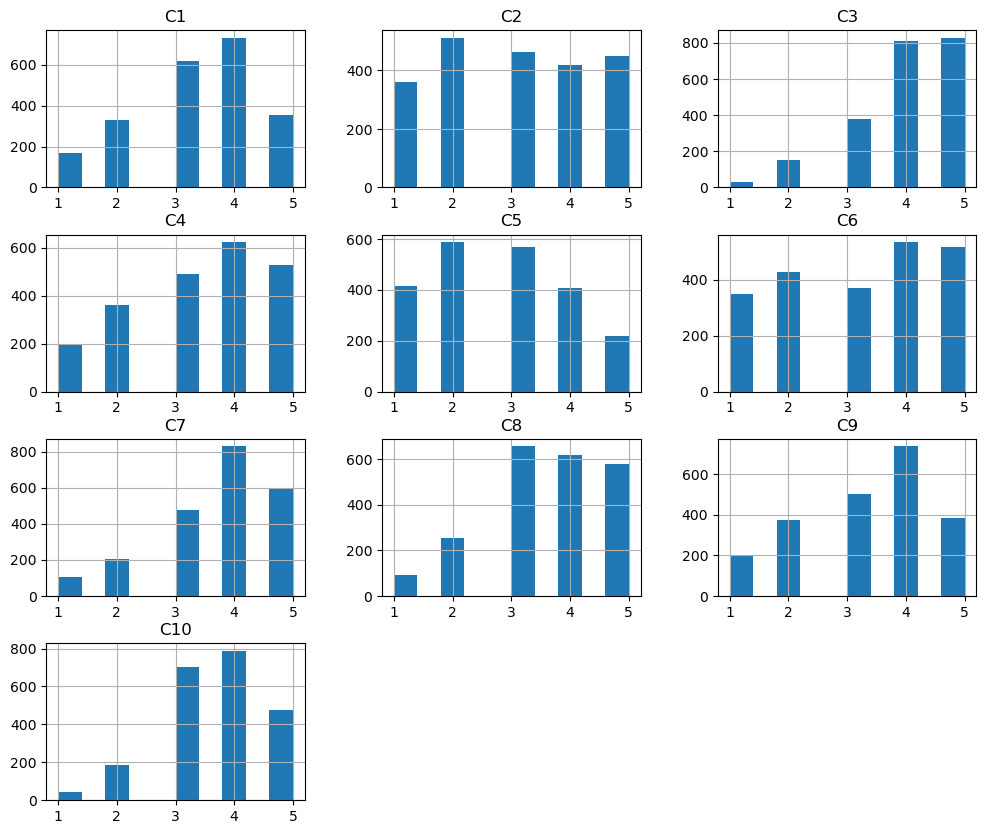

In [50]:
df[conscientious_items].hist(figsize=(12,10))
plt.show()

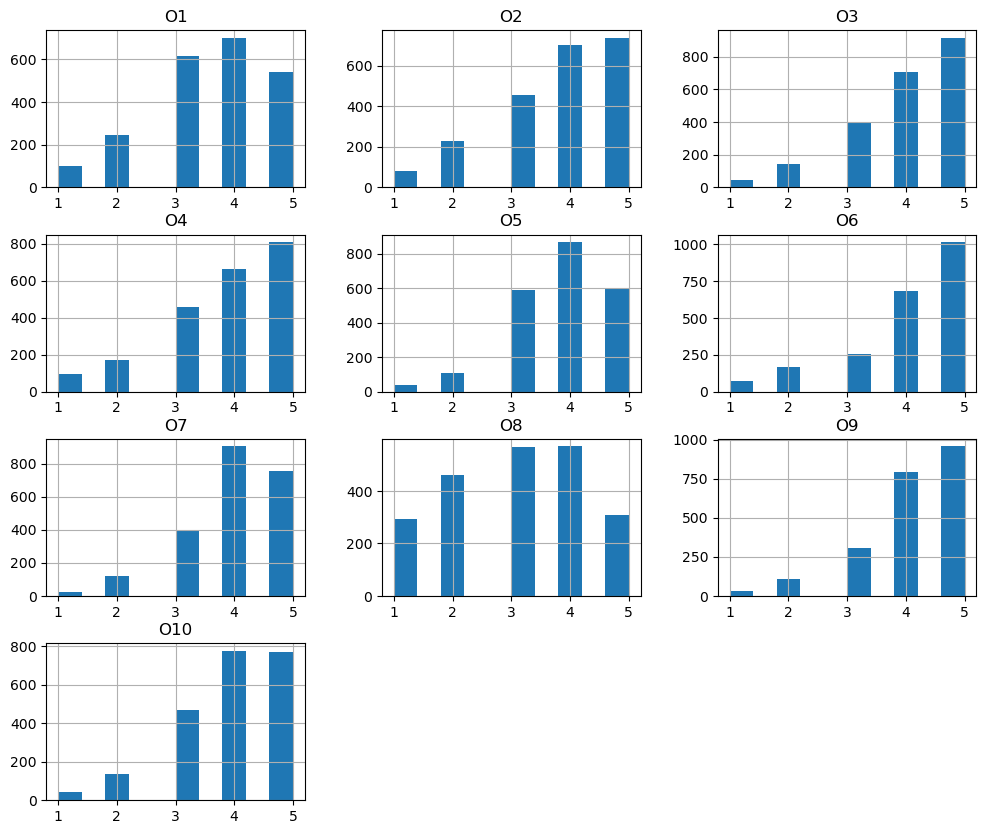

In [51]:
df[openness_items].hist(figsize=(12,10))
plt.show()

In [52]:
bigfive_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]

correlations = df[["Grit"] + bigfive_cols].corr()
print(correlations["Grit"])

Grit                 1.000000
Openness             0.095464
Conscientiousness    0.643038
Extraversion         0.215418
Agreeableness        0.282621
Neuroticism          0.373802
Name: Grit, dtype: float64


Coscientiousness is highly correlated with grit

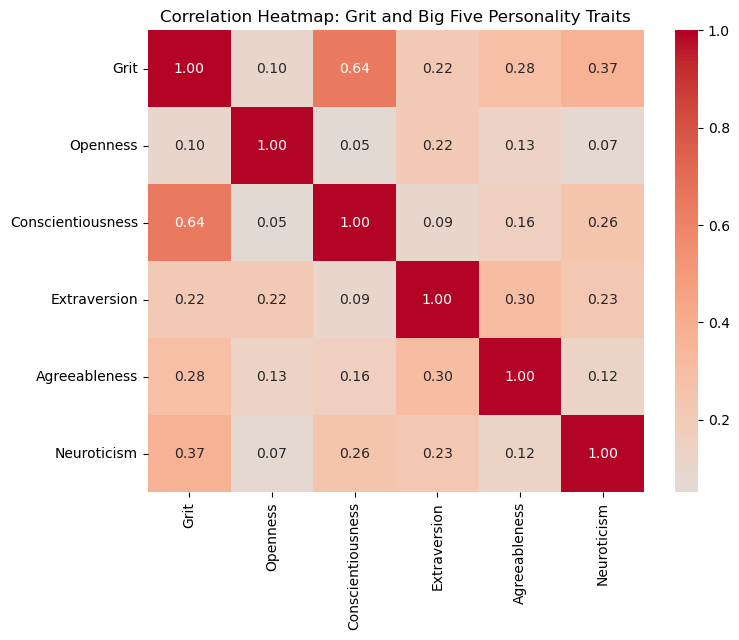

In [53]:
# creating correlation matrix
corr = df[['Grit', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap: Grit and Big Five Personality Traits')
plt.show()

In [54]:
# Add new columns age, familysize to the existing list of demographics
demographics.extend(["age", "familysize"])

#creating a demographic df
demographics_df = df[demographics]

# checking for any remaining 0 values in demographics
demographicZeroCount = (demographics_df == 0).sum()
print(demographicZeroCount)


print(demographics_df.head(
))

education      19
urban          25
gender          3
engnat         11
hand            7
religion       28
orientation    55
race           17
voted          16
married         8
country         0
age             0
familysize      0
dtype: int64
    education  urban  gender  engnat  hand  religion  orientation  race  \
4           4      2       1       2     1         2            1     1   
6           3      2       1       1     1         3            1     4   
8           3      3       1       2     1        12            1     4   
10          3      1       1       2     1         8            1     1   
11          2      2       2       1     2        12            1     4   

    voted  married country  age  familysize  
4       2        2      JP   38           3  
6       2        3      US   35           1  
8       2        3      EU   50           3  
10      1        3      AE   52           3  
11      1        1      AU   20           1  


In [55]:
#checking unique value in each column
for col in demographics_df.columns:
    print(col, df[col].unique())


education [4 3 2 1 0]
urban [2 3 1 0]
gender [1 2 3 0]
engnat [2 1 0]
hand [1 2 3 0]
religion [ 2  3 12  8  4 10  6  1  9  7  0  5 11]
orientation [1 5 2 4 0 3]
race [1 4 3 2 5 0]
voted [2 1 0]
married [2 3 1 0]
country ['JP' 'US' 'EU' 'AE' 'AU' 'MY' 'FI' 'NO' 'GB' 'CZ' 'IN' 'RO' 'PK' 'BG'
 'BH' 'CA' 'ZA' 'SE' 'DK' 'IT' 'AR' 'EG' 'LU' 'SG' 'KE' 'HK' 'PL' 'TR'
 'BR' 'PH' 'CO' 'GH' 'NL' 'FR' 'GR' 'EE' 'ES' 'UA' 'MM' 'Unknown' 'IE'
 'DE' 'MA' 'IL' 'HU' 'MX' 'PR' 'ID' 'HR' 'KR' 'NI' 'CN' 'LK' 'JM' 'BZ'
 'LT' 'NZ' 'MC' 'IS' 'BE' 'PT' 'DZ' 'SI' 'UG' 'TH' 'BS' 'VN' 'TW' 'SA'
 'TN' 'DO' 'AT' 'CR' 'CH' 'KW' 'RU' 'TT' 'AL' 'BN' 'CL' 'JO' 'BD' 'KH'
 'SD' 'ZW' 'CY' 'NG' 'BB' 'SY' 'LV' 'ML' 'RS' 'IR' 'MT' 'NP' 'A1' 'GT'
 'BA']
age [38 35 50 52 20 23 27 18 24 26 25 44 19 21 30 36 47 22 43 40 62 34 31 48
 33 42 39 32 37 45 58 57 49 51 55 46 53 65 63 28 60 29 67 54 64 59 41 56
 61 66 68]
familysize [ 3  1  9  2  4  6  7  5 17  8 10 11 12 13]


In [56]:
# Replace 0s with NaN in all demographic columns

for col in demographics:
    if 0 in df[col].unique():
        df[col] = df[col].replace(0, np.nan)

print(df[demographics].head)


<bound method NDFrame.head of       education  urban  gender  engnat  hand  religion  orientation  race  \
4           4.0    2.0     1.0     2.0   1.0       2.0          1.0   1.0   
6           3.0    2.0     1.0     1.0   1.0       3.0          1.0   4.0   
8           3.0    3.0     1.0     2.0   1.0      12.0          1.0   4.0   
10          3.0    1.0     1.0     2.0   1.0       8.0          1.0   1.0   
11          2.0    2.0     2.0     1.0   2.0      12.0          1.0   4.0   
...         ...    ...     ...     ...   ...       ...          ...   ...   
4260        4.0    3.0     1.0     1.0   1.0      12.0          1.0   4.0   
4263        2.0    3.0     2.0     2.0   1.0       2.0          1.0   4.0   
4265        2.0    1.0     2.0     1.0   1.0       1.0          1.0   4.0   
4266        3.0    2.0     1.0     1.0   1.0       1.0          1.0   4.0   
4269        2.0    3.0     1.0     1.0   1.0       2.0          1.0   4.0   

      voted  married country  age  familysize

In [57]:
# Identify categorical columns
categorical_cols = ['gender', 'education', 'urban', 'religion', 'race', 
                    'married', 'engnat', 'hand', 'orientation', 'voted', 'country']

# Convert to category dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Optional: check how they look
for col in categorical_cols:
    print(f"\n{col} categories:", df[col].unique())


gender categories: [1.0, 2.0, 3.0, NaN]
Categories (3, float64): [1.0, 2.0, 3.0]

education categories: [4.0, 3.0, 2.0, 1.0, NaN]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

urban categories: [2.0, 3.0, 1.0, NaN]
Categories (3, float64): [1.0, 2.0, 3.0]

religion categories: [2.0, 3.0, 12.0, 8.0, 4.0, ..., 9.0, 7.0, NaN, 5.0, 11.0]
Length: 13
Categories (12, float64): [1.0, 2.0, 3.0, 4.0, ..., 9.0, 10.0, 11.0, 12.0]

race categories: [1.0, 4.0, 3.0, 2.0, 5.0, NaN]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

married categories: [2.0, 3.0, 1.0, NaN]
Categories (3, float64): [1.0, 2.0, 3.0]

engnat categories: [2.0, 1.0, NaN]
Categories (2, float64): [1.0, 2.0]

hand categories: [1.0, 2.0, 3.0, NaN]
Categories (3, float64): [1.0, 2.0, 3.0]

orientation categories: [1.0, 5.0, 2.0, 4.0, NaN, 3.0]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

voted categories: [2.0, 1.0, NaN]
Categories (2, float64): [1.0, 2.0]

country categories: ['JP', 'US', 'EU', 'AE', 'AU', ..., 'MT', 

In [58]:
df[categorical_cols].isna().sum()


gender          3
education      19
urban          25
religion       28
race           17
married         8
engnat         11
hand            7
orientation    55
voted          16
country         0
dtype: int64

In [59]:

# Define mapping dictionaries
education_map = {1: 'Less than high school', 2: 'High school', 3: 'University', 4: 'Graduate'}
urban_map = {1: 'Rural', 2: 'Suburban', 3: 'Urban'}
gender_map = {1: 'Male', 2: 'Female', 3: 'Other'}
engnat_map = {1: 'Yes', 2: 'No'}
hand_map = {1: 'Right', 2: 'Left', 3: 'Both'}
religion_map = {
    1: 'Agnostic', 2: 'Atheist', 3: 'Buddhist', 4: 'Christian (Catholic)',
    5: 'Christian (Mormon)', 6: 'Christian (Protestant)', 7: 'Christian (Other)',
    8: 'Hindu', 9: 'Jewish', 10: 'Muslim', 11: 'Sikh', 12: 'Other'
}
orientation_map = {1: 'Heterosexual', 2: 'Bisexual', 3: 'Homosexual', 4: 'Asexual', 5: 'Other'}
race_map = {1: 'Asian', 2: 'Arab', 3: 'Black', 4: 'Indigenous/Native/White', 5: 'Other'}
voted_map = {1: 'Yes', 2: 'No'}
married_map = {1: 'Never married', 2: 'Currently married', 3: 'Previously married'}

# --- Apply mappings and explicitly set ordered categories ---

df['education'] = pd.Categorical(
    df['education'].map(education_map),
    categories=['Less than high school', 'High school', 'University', 'Graduate'],
    ordered=True
)

df['urban'] = pd.Categorical(
    df['urban'].map(urban_map),
    categories=['Rural', 'Suburban', 'Urban'],
    ordered=True
)

df['married'] = pd.Categorical(
    df['married'].map(married_map),
    categories=['Never married', 'Currently married', 'Previously married'],
    ordered=True
)

country_categories = [
    'JP', 'US', 'EU', 'AE', 'AU', 'MY', 'FI', 'NO', 'GB', 'CZ', 'IN', 'RO', 'PK', 'BG',
    'BH', 'CA', 'ZA', 'SE', 'DK', 'IT', 'AR', 'EG', 'LU', 'SG', 'KE', 'HK', 'PL', 'TR',
    'BR', 'PH', 'CO', 'GH', 'NL', 'FR', 'GR', 'EE', 'ES', 'UA', 'MM', 'Unknown', 'IE',
    'DE', 'MA', 'IL', 'HU', 'MX', 'PR', 'ID', 'HR', 'KR', 'NI', 'CN', 'LK', 'JM', 'BZ',
    'LT', 'NZ', 'MC', 'IS', 'BE', 'PT', 'DZ', 'SI', 'UG', 'TH', 'BS', 'VN', 'TW', 'SA',
    'TN', 'DO', 'AT', 'CR', 'CH', 'KW', 'RU', 'TT', 'AL', 'BN', 'CL', 'JO', 'BD', 'KH',
    'SD', 'ZW', 'CY', 'NG', 'BB', 'SY', 'LV', 'ML', 'RS', 'IR', 'MT', 'NP', 'A1', 'GT',
    'BA'
]


# Unordered categoricals (nominal variables)
df['gender'] = pd.Categorical(df['gender'].map(gender_map))
df['engnat'] = pd.Categorical(df['engnat'].map(engnat_map))
df['hand'] = pd.Categorical(df['hand'].map(hand_map))
df['religion'] = pd.Categorical(df['religion'].map(religion_map))
df['orientation'] = pd.Categorical(df['orientation'].map(orientation_map))
df['race'] = pd.Categorical(df['race'].map(race_map))
df['voted'] = pd.Categorical(df['voted'].map(voted_map))
df['country'] = pd.Categorical(df['country'], categories=country_categories)

# Keep numeric columns as numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['familysize'] = pd.to_numeric(df['familysize'], errors='coerce')


**ordering the categories**


In [60]:
# Summary statistics specifically for age
print(df['age'].describe())

# Value counts for each categorical column
for col in categorical_cols:
    print(f"\n{col.upper()} distribution:")
    print(df[col].value_counts(dropna=False))

# Summary statistics specifically for familysize
print(df['familysize'].describe())

# Value counts for each categorical column
for col in categorical_cols:
    print(f"\n{col.upper()} distribution:")
    print(df[col].value_counts(dropna=False))

count    2200.000000
mean       28.273182
std        11.234262
min        18.000000
25%        20.000000
50%        24.000000
75%        34.000000
max        68.000000
Name: age, dtype: float64

GENDER distribution:
gender
Female    1390
Male       799
Other        8
NaN          3
Name: count, dtype: int64

EDUCATION distribution:
education
High school              943
University               791
Graduate                 384
Less than high school     63
NaN                       19
Name: count, dtype: int64

URBAN distribution:
urban
Urban       1037
Suburban     699
Rural        439
NaN           25
Name: count, dtype: int64

RELIGION distribution:
religion
Christian (Catholic)      378
Christian (Other)         341
Atheist                   334
Agnostic                  331
Christian (Protestant)    227
Other                     196
Muslim                    139
Hindu                     112
Buddhist                   60
NaN                        28
Christian (Mormon)         23
J

FINDING THE RELATIONSHIP BETWEEN DEMOGRAPHICS 

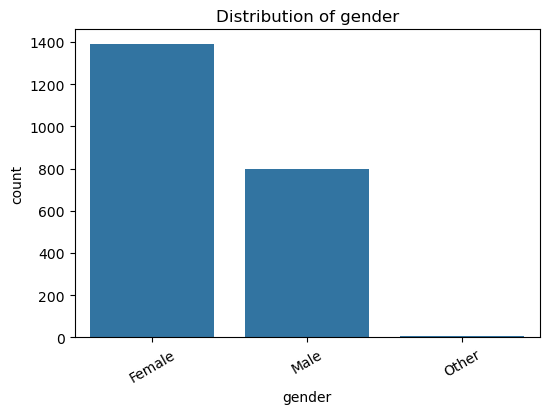

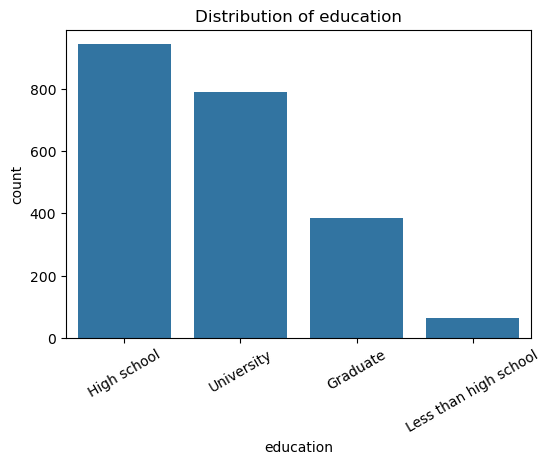

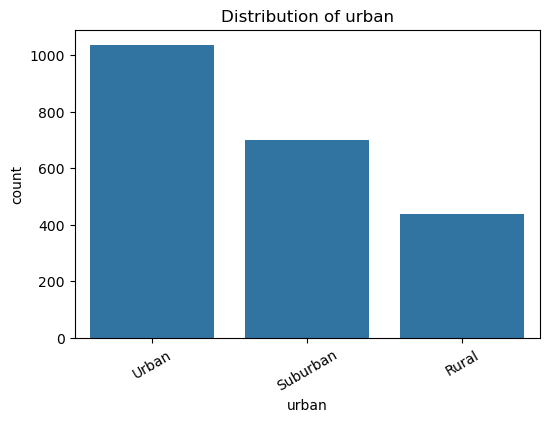

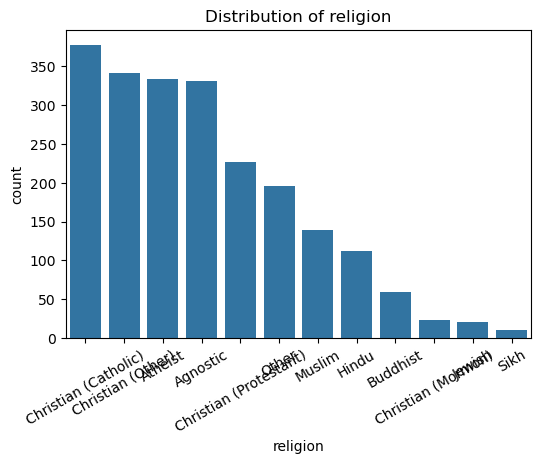

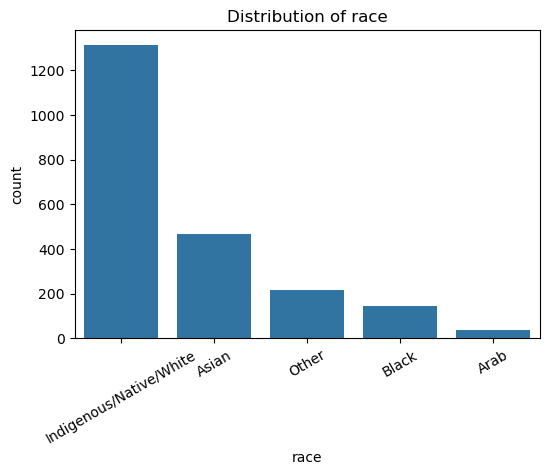

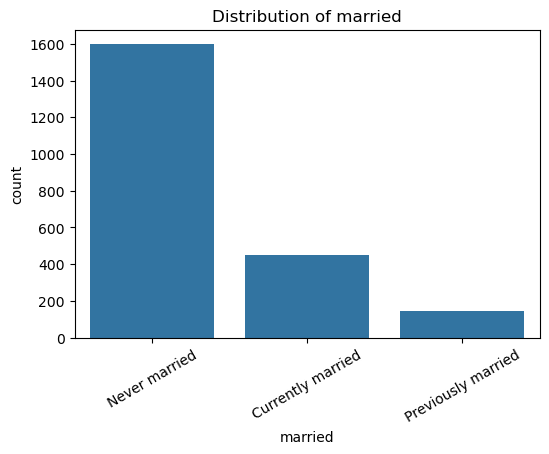

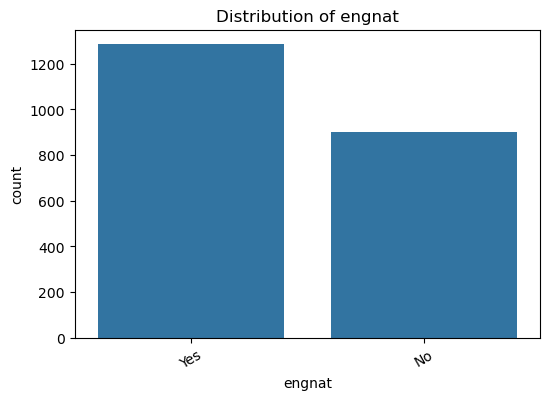

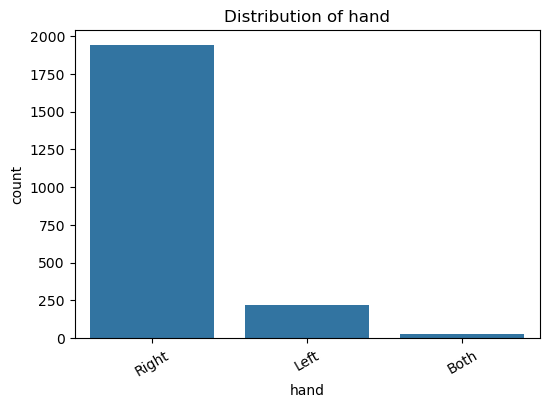

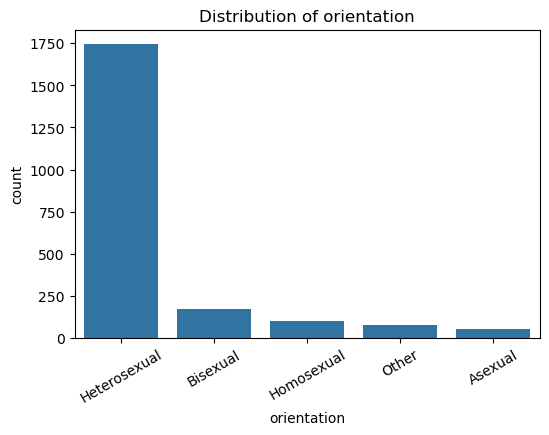

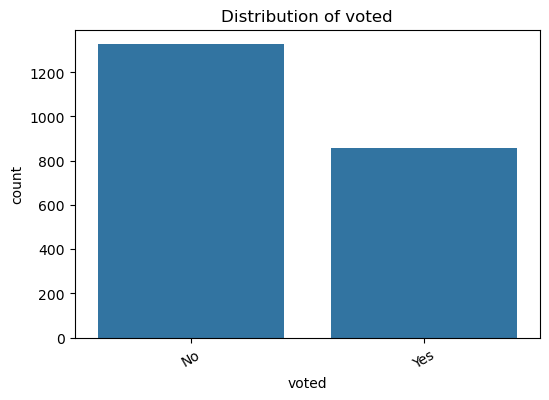

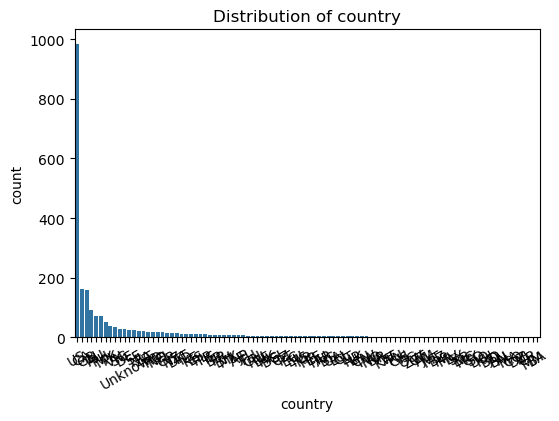

In [61]:
#graphs indicating demographic distribution per column

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
    plt.show()


In [62]:
#checking what columns are categorized
for col in df.select_dtypes(['category']).columns:
    print(f"{col}: ordered = {df[col].cat.ordered}")


country: ordered = False
education: ordered = True
urban: ordered = True
gender: ordered = False
engnat: ordered = False
hand: ordered = False
religion: ordered = False
orientation: ordered = False
race: ordered = False
voted: ordered = False
married: ordered = True


In [63]:
#checking order in columns
for col in df.select_dtypes(include='category').columns:
    cat = df[col].dtype
    print(f"{col}: ordered={cat.ordered}, categories={df[col].cat.categories.tolist()[:5]}")


country: ordered=False, categories=['JP', 'US', 'EU', 'AE', 'AU']
education: ordered=True, categories=['Less than high school', 'High school', 'University', 'Graduate']
urban: ordered=True, categories=['Rural', 'Suburban', 'Urban']
gender: ordered=False, categories=['Male', 'Female', 'Other']
engnat: ordered=False, categories=['Yes', 'No']
hand: ordered=False, categories=['Right', 'Left', 'Both']
religion: ordered=False, categories=['Agnostic', 'Atheist', 'Buddhist', 'Christian (Catholic)', 'Christian (Mormon)']
orientation: ordered=False, categories=['Heterosexual', 'Bisexual', 'Homosexual', 'Asexual', 'Other']
race: ordered=False, categories=['Asian', 'Arab', 'Black', 'Indigenous/Native/White', 'Other']
voted: ordered=False, categories=['Yes', 'No']
married: ordered=True, categories=['Never married', 'Currently married', 'Previously married']


# Step 3A: Correlation between grit and demographics

Correlation between grit and age: 0.24


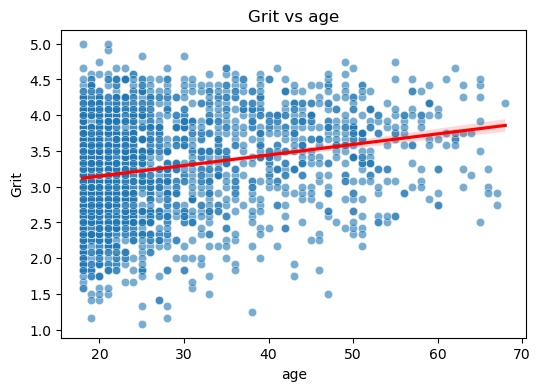

Correlation between grit and familysize: 0.09


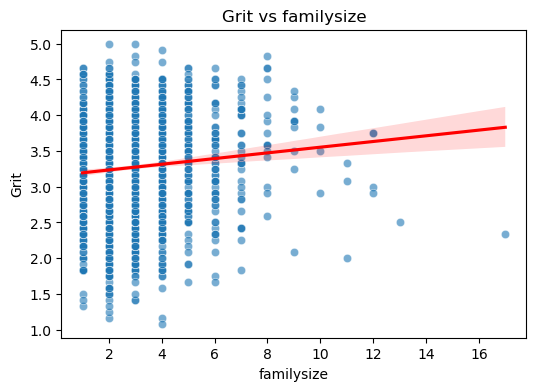

In [64]:
# Step 3A: Correlation between grit and numeric demographics
numeric_cols = ['age', 'familysize']

for col in numeric_cols:
    corr = df['Grit'].corr(df[col])
    print(f"Correlation between grit and {col}: {corr:.2f}")

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='Grit', data=df, alpha=0.6)
    sns.regplot(x=col, y='Grit', data=df, scatter=False, color='red')
    plt.title(f"Grit vs {col}")
    plt.show()

    #remove outliers above 70
    #overall range 4.5 grit higher
    #there is a slight positive correlation between age and grit
    #after age 30, most people have grit above 2.5
    #grit doesnt depend too much on age, because the correlation is low
    #corelation between familysize and grit is very low, almost 0.


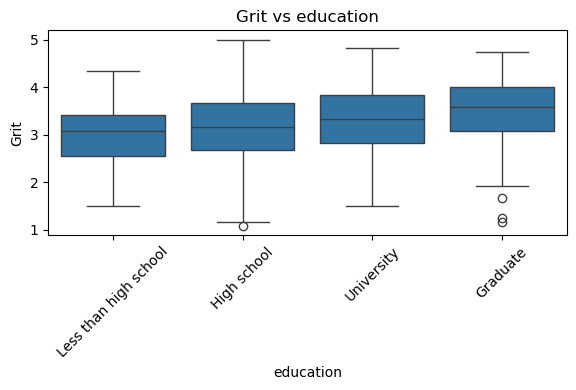

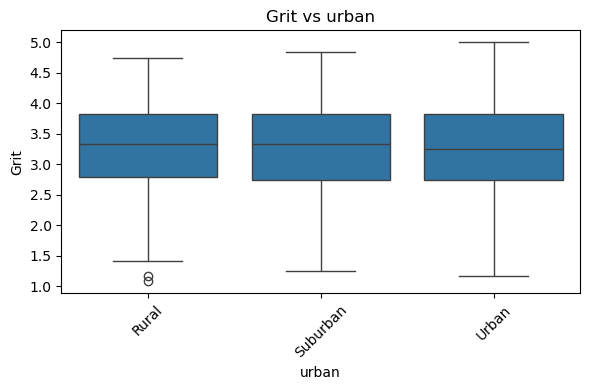

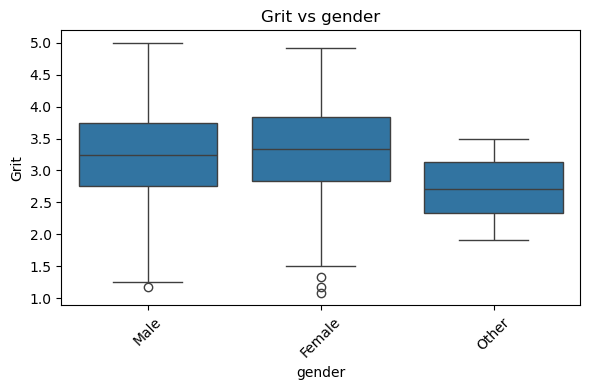

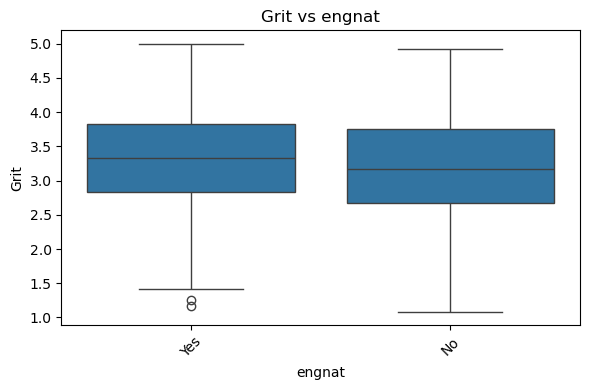

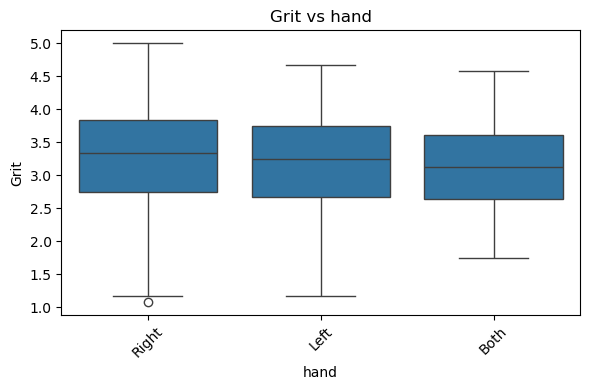

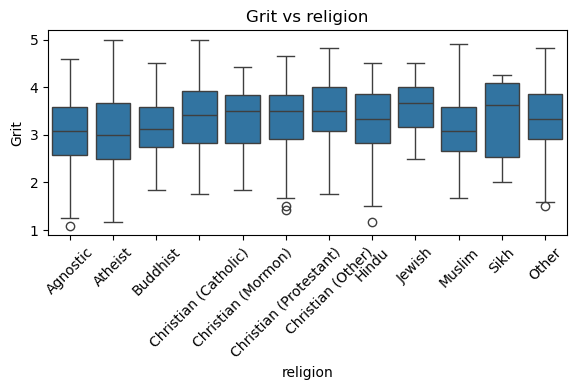

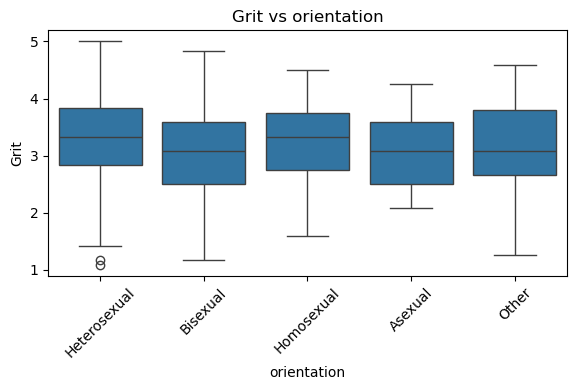

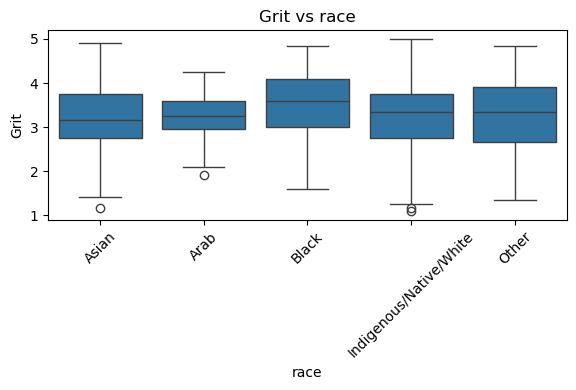

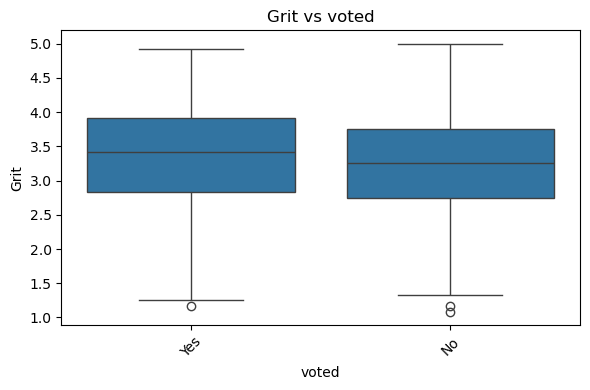

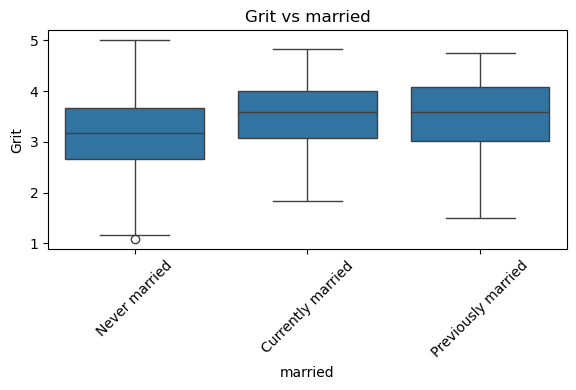

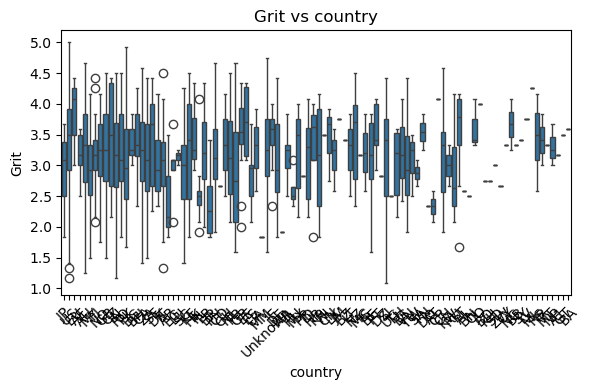

In [65]:
# 2️⃣ Boxplots for categorical variables
categorical_vars = ['education', 'urban', 'gender', 'engnat', 'hand',
                    'religion', 'orientation', 'race', 'voted', 'married', 'country']

for col in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='Grit', data=df)
    plt.title(f'Grit vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #slight positive correlation between education level and grit, hence higher education level, slightly higher grit, but not significant (0.5 difference).
    #urban,suburban , and rural have similar median grit, urban has slightly higher, hence no significant difference.
    #females have slightly higher median grit, but not significant.
    #religion: agnostic, atheist, catholic, buddhist have slightly higher median grit, but not significant
    #orientation: asexual has slightly higher median grit, but not significant
    #race: native/indigenous/white has slightly higher median grit, but not significant
    #voted: yes has slightly higher median grit, but not significant
    #married: currently married has slightly higher median grit, but not significant
    #country: JP, US, EU have slightly higher median grit, but not significant.
    #ethically, since there is no significant correlation between any of these categorical variables and grit,
    #it would be inappropriate to make any assumptions or generalizations based on these findings.


Compare Grit Across Groups using p-value, either t-independent test, or one way anova test. 

#key to read it 
t-test	2 groups (e.g., Male vs Female)	p < 0.05 → Significant difference in average Grit
ANOVA	3+ groups (e.g., Education levels)	p < 0.05 → At least one group differs in average Grit

In [66]:
from scipy import stats
def compare_grit_by_group(df, col):
    groups = df[col].dropna().unique()

    if len(groups) < 2:
        print(f"{col}: Not enough groups to test\n")
        return

    # If exactly 2 groups -> Independent t-test
    if len(groups) == 2:
        g1 = df[df[col] == groups[0]]['Grit'].dropna()
        g2 = df[df[col] == groups[1]]['Grit'].dropna()
        t, p = stats.ttest_ind(g1, g2, equal_var=False)
        print(f"{col}: t-test between {groups[0]} & {groups[1]} → p = {p:.4f}")

    # If 3 or more groups -> One-way ANOVA
    else:
        samples = [df[df[col] == g]['Grit'].dropna() for g in groups]
        f, p = stats.f_oneway(*samples)
        print(f"{col}: ANOVA across {len(groups)} groups → p = {p:.4f}")


    #running for each variable.
for col in categorical_vars:
        compare_grit_by_group(df, col)



education: ANOVA across 4 groups → p = 0.0000
urban: ANOVA across 3 groups → p = 0.4866
gender: ANOVA across 3 groups → p = 0.0043
engnat: t-test between No & Yes → p = 0.0001
hand: ANOVA across 3 groups → p = 0.0834
religion: ANOVA across 12 groups → p = 0.0000
orientation: ANOVA across 5 groups → p = 0.0001
race: ANOVA across 5 groups → p = 0.0003
voted: t-test between No & Yes → p = 0.0000
married: ANOVA across 3 groups → p = 0.0000
country: ANOVA across 98 groups → p = 0.0003


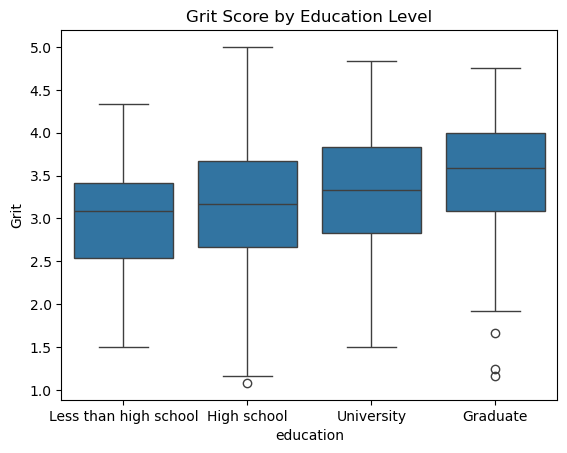

In [67]:
#visualize above results
sns.boxplot(x='education', y='Grit', data=df)
plt.title('Grit Score by Education Level')
plt.show()

1. Statistical significance ≠ visual difference

P-values measure whether a difference is real (not due to random chance),
not how large that difference is.

In large datasets (like yours, n ≈ 2000+), even tiny differences in group averages can produce very small p-values (like 0.0001).
 Example:

If average Grit is 3.45 for males and 3.55 for females,
that’s only a 0.1 difference visually (hard to see on a plot),
but with thousands of samples, ANOVA may find it statistically significant.

### Exploring the correlation between Demographic Columns and Big 5 personalities

In [68]:
df_ = df[['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'education', 'urban', 'gender',
                    'religion', 'orientation', 'race', 'married', 'country']]

df_.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 4 to 4269
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Openness           2200 non-null   float64 
 1   Conscientiousness  2200 non-null   float64 
 2   Extraversion       2200 non-null   float64 
 3   Agreeableness      2200 non-null   float64 
 4   Neuroticism        2200 non-null   float64 
 5   education          2181 non-null   category
 6   urban              2175 non-null   category
 7   gender             2197 non-null   category
 8   religion           2172 non-null   category
 9   orientation        2145 non-null   category
 10  race               2183 non-null   category
 11  married            2192 non-null   category
 12  country            2200 non-null   category
dtypes: category(8), float64(5)
memory usage: 124.5 KB


In [69]:
df_.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,education,urban,gender,religion,orientation,race,married,country
4,3.0,3.8,1.2,3.3,2.5,Graduate,Suburban,Male,Atheist,Heterosexual,Asian,Currently married,JP
6,5.0,3.4,4.0,3.6,2.0,University,Suburban,Male,Buddhist,Heterosexual,Indigenous/Native/White,Previously married,US
8,4.3,4.0,4.4,4.7,4.5,University,Urban,Male,Other,Heterosexual,Indigenous/Native/White,Previously married,EU
10,3.4,3.8,3.0,3.6,4.6,University,Rural,Male,Hindu,Heterosexual,Asian,Previously married,AE
11,4.4,3.9,2.0,3.4,1.1,High school,Suburban,Female,Other,Heterosexual,Indigenous/Native/White,Never married,AU


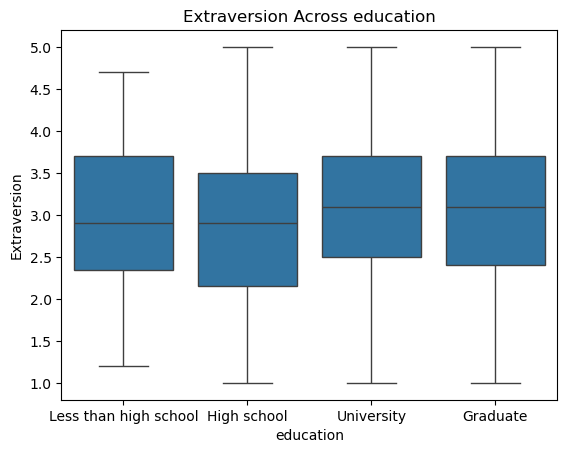

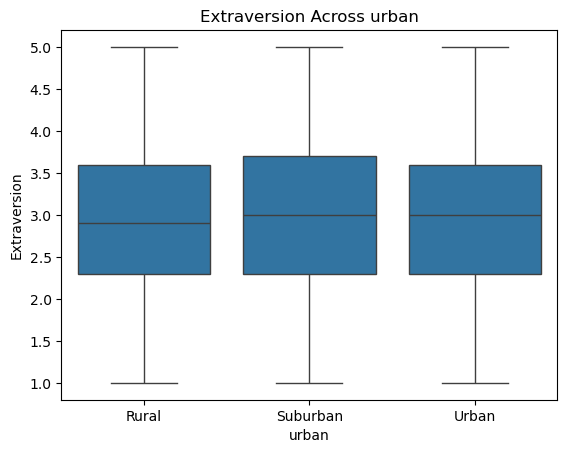

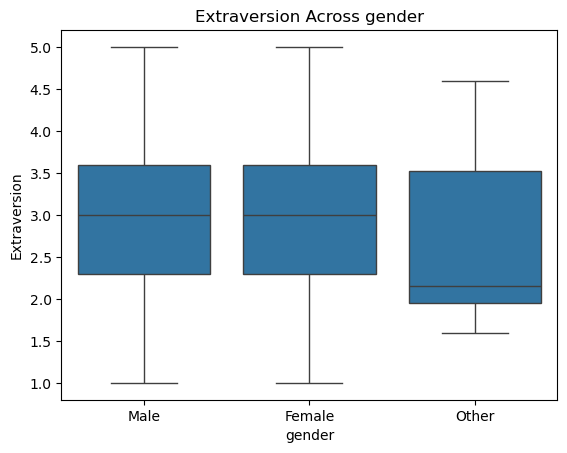

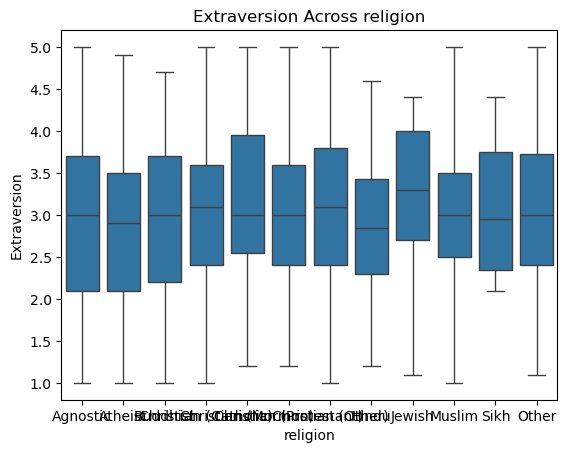

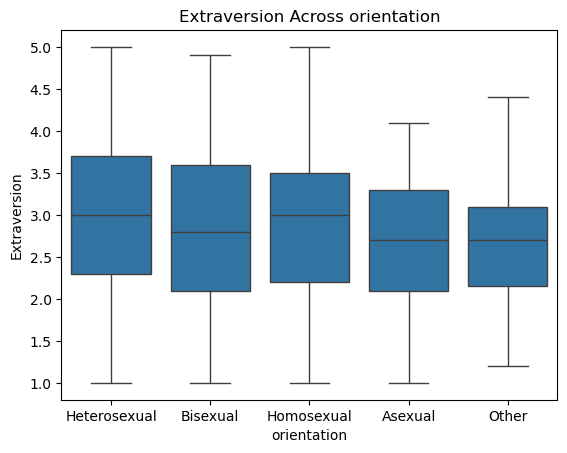

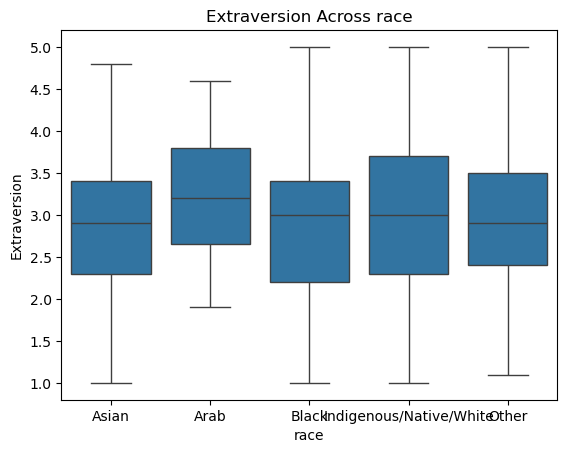

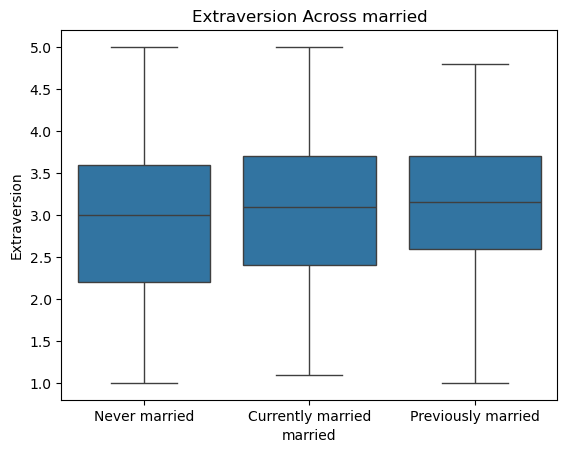

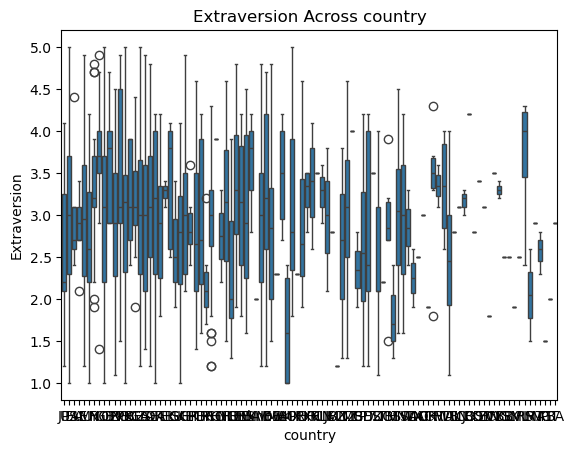

In [70]:
demographics = ['education', 'urban', 'gender', 'religion', 'orientation', 'race', 'married', 'country']

for i in demographics:
    sns.boxplot(x=i, y='Extraversion', data=df_)
    plt.title(f"Extraversion Across {i}")
    plt.show()

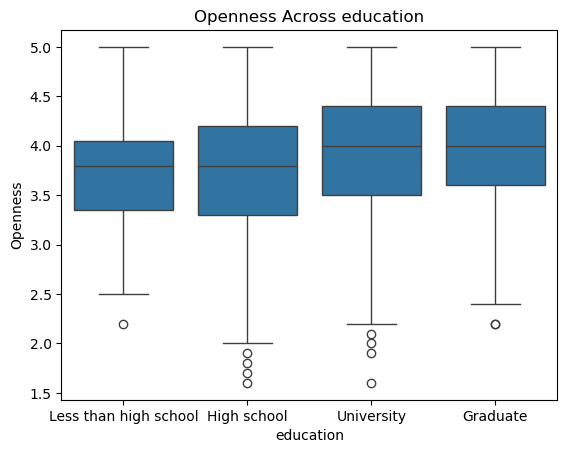

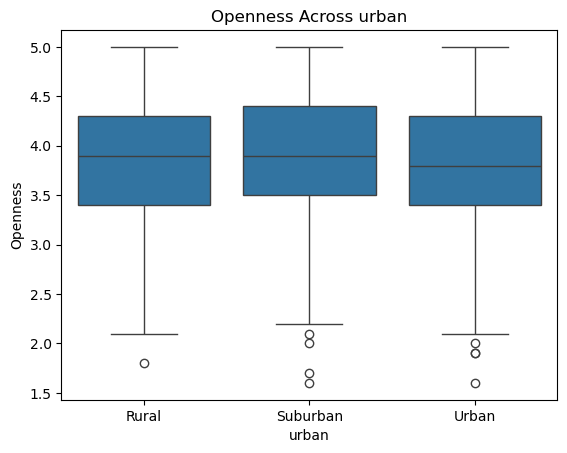

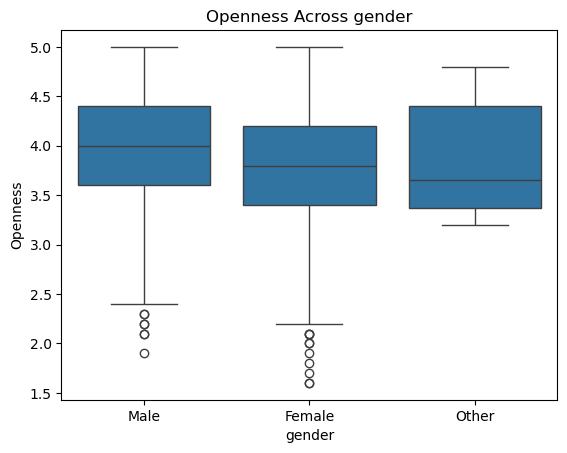

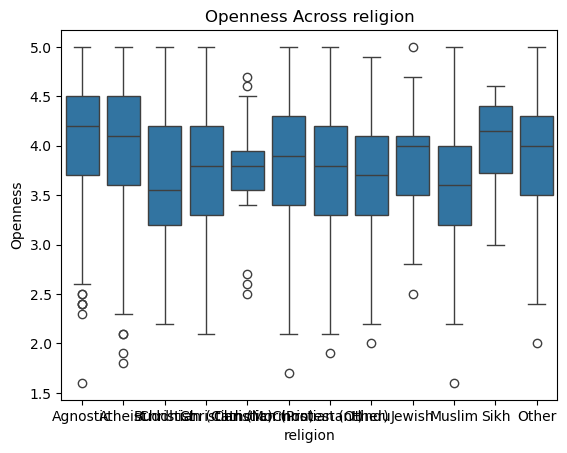

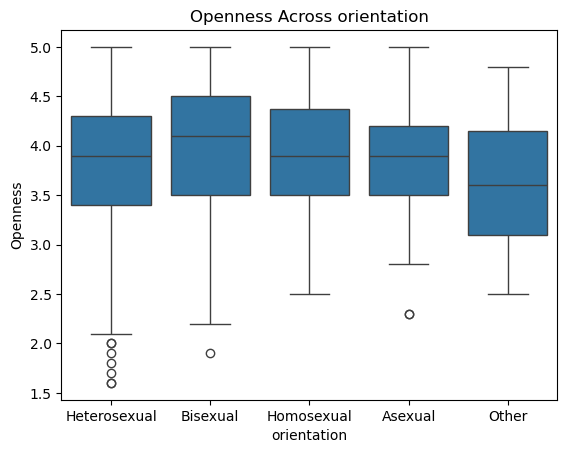

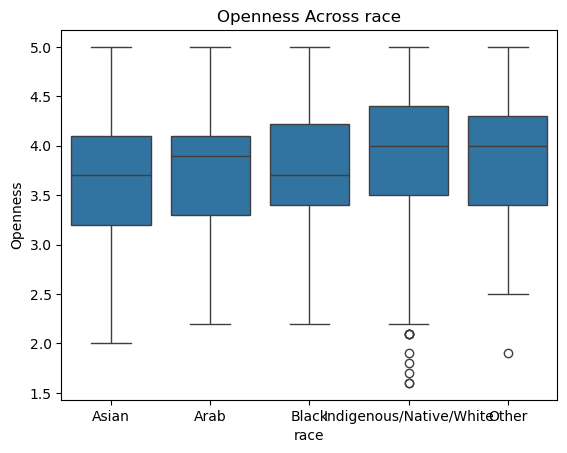

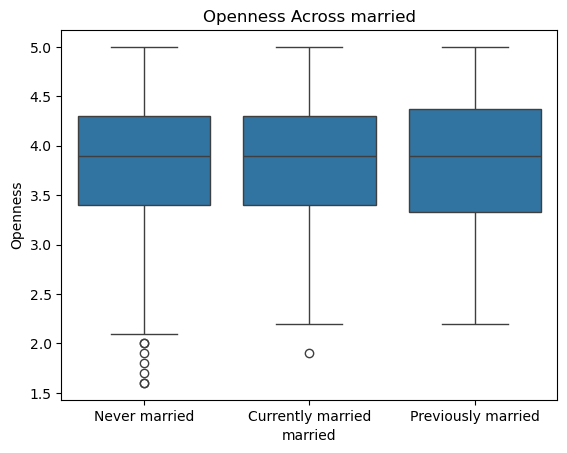

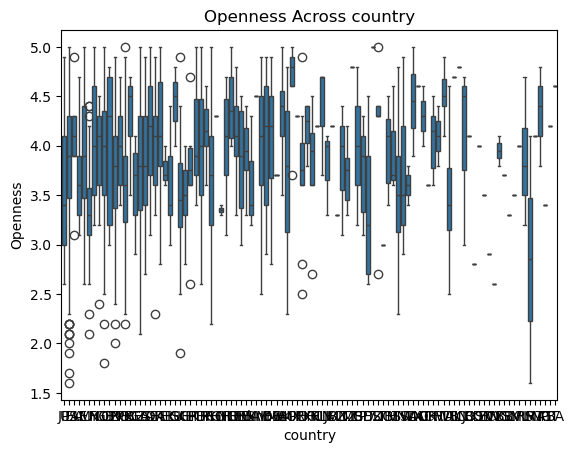

In [71]:
for i in demographics:
    sns.boxplot(x=i, y='Openness', data=df_)
    plt.title(f"Openness Across {i}")
    plt.show()

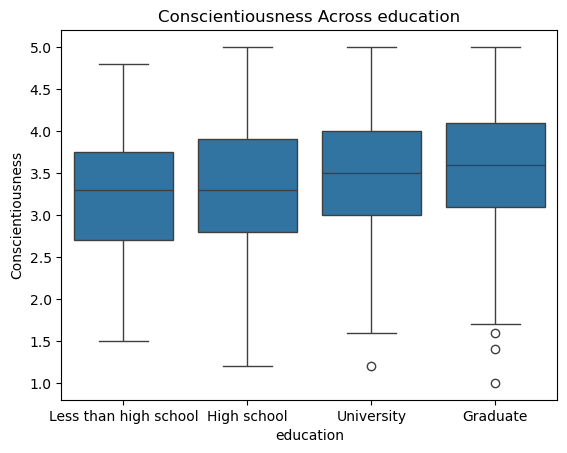

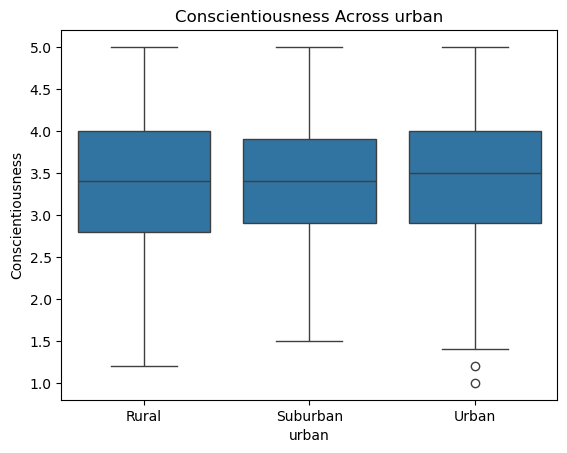

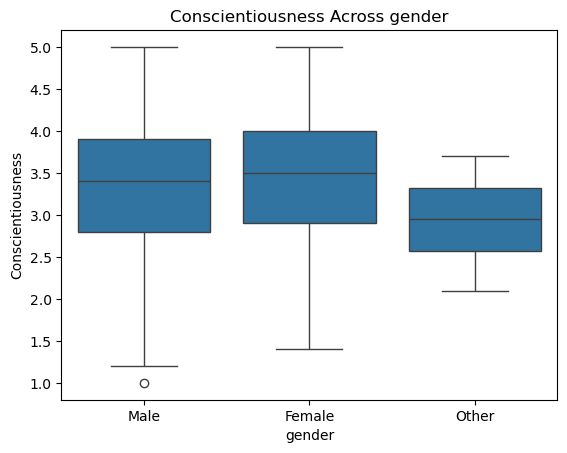

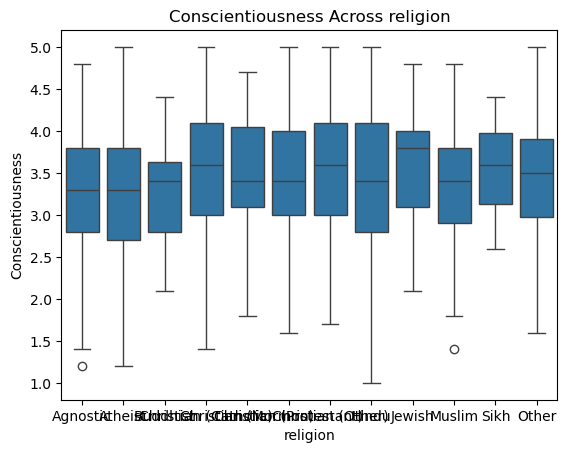

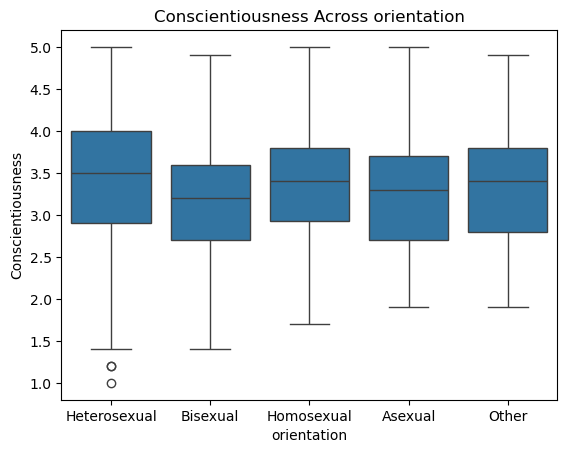

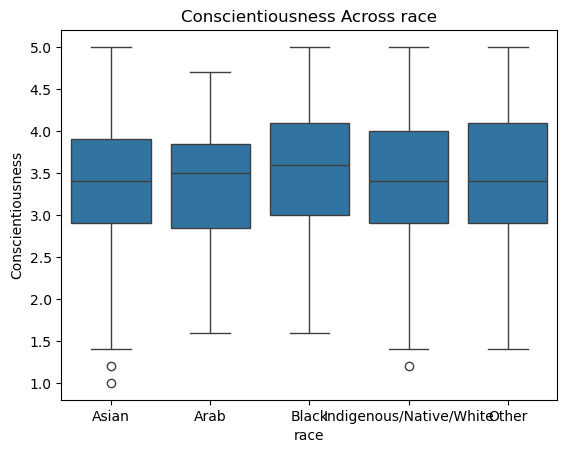

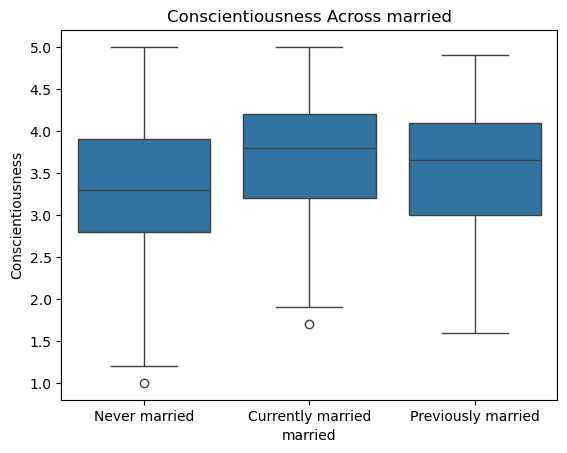

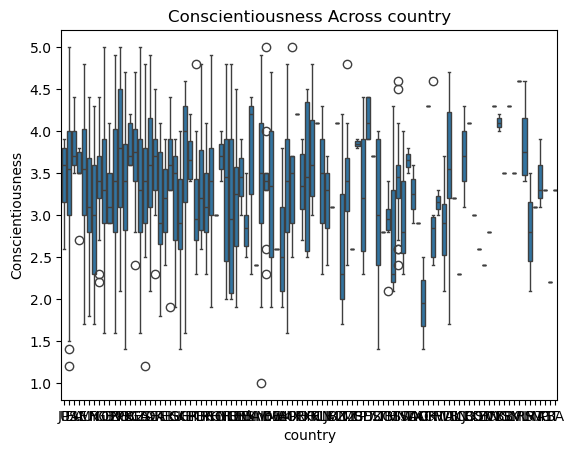

In [72]:
for i in demographics:
    sns.boxplot(x=i, y='Conscientiousness', data=df_)
    plt.title(f"Conscientiousness Across {i}")
    plt.show()

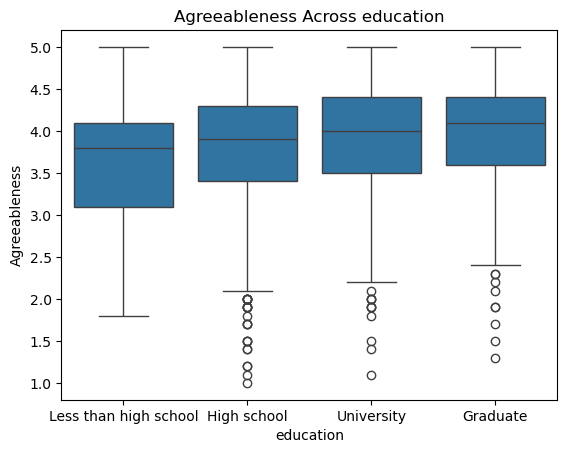

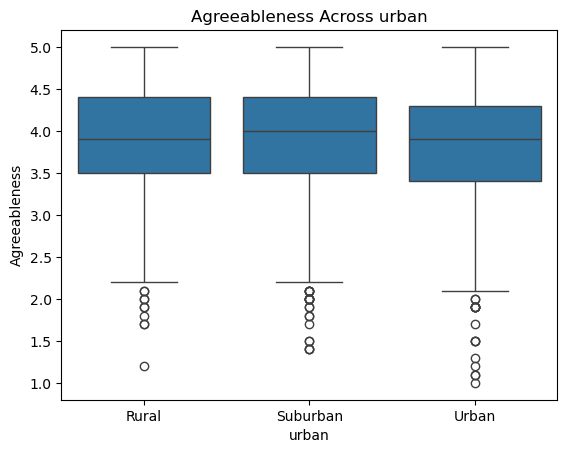

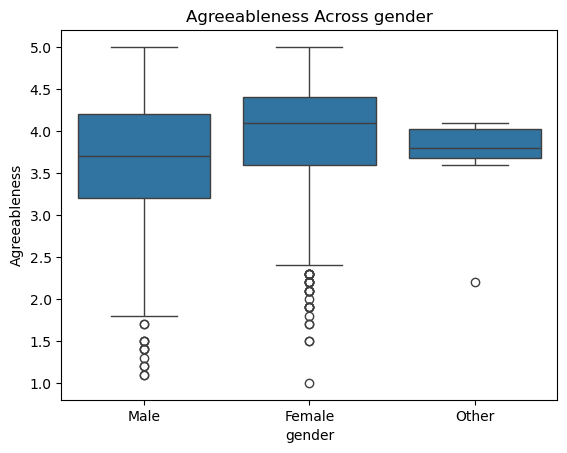

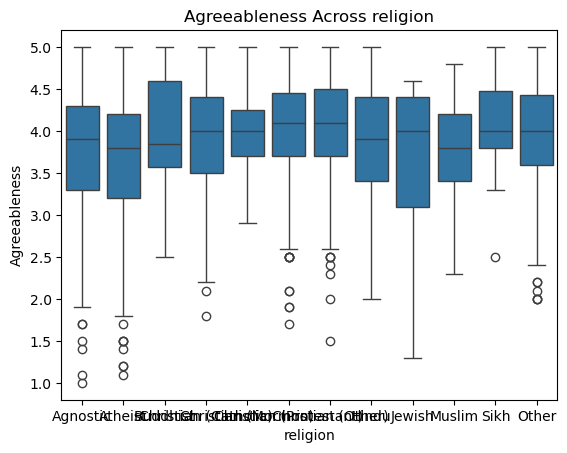

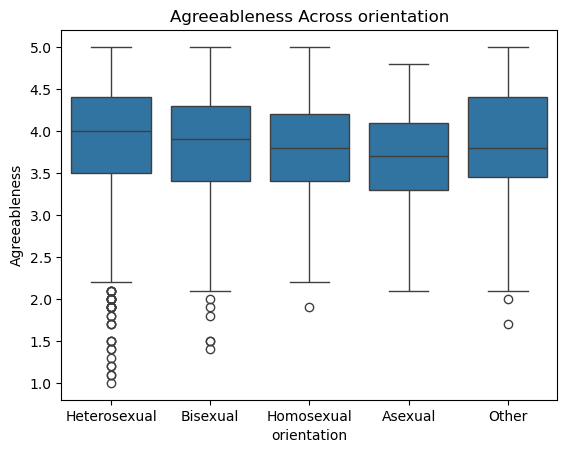

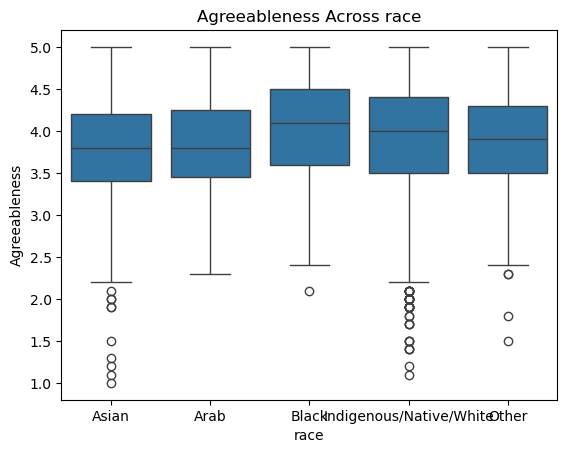

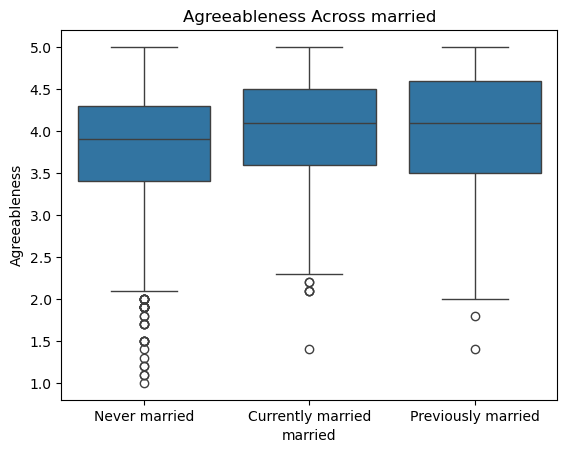

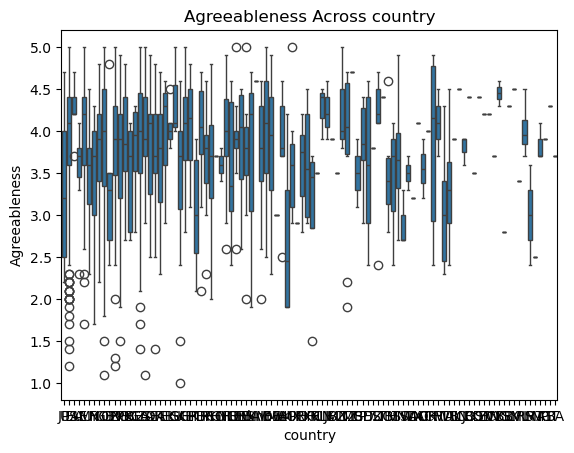

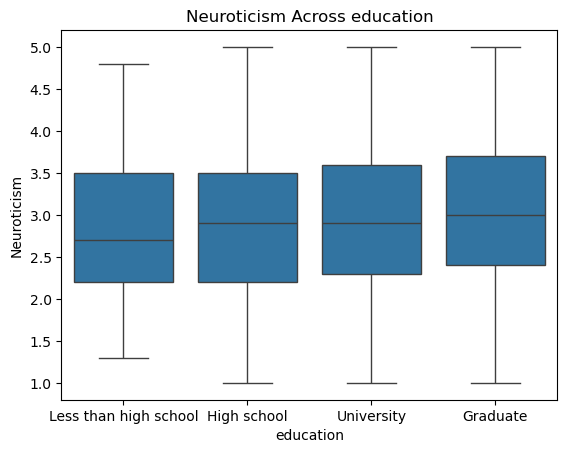

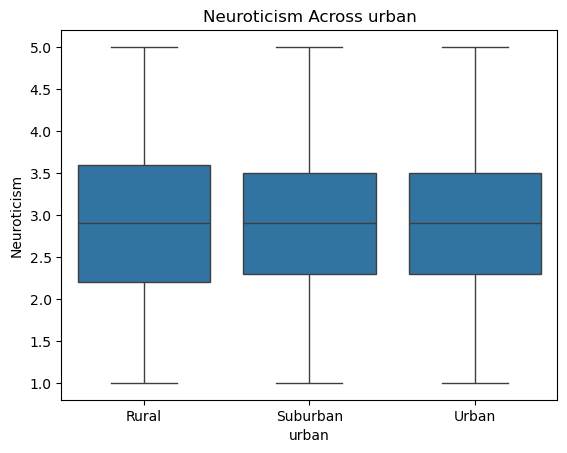

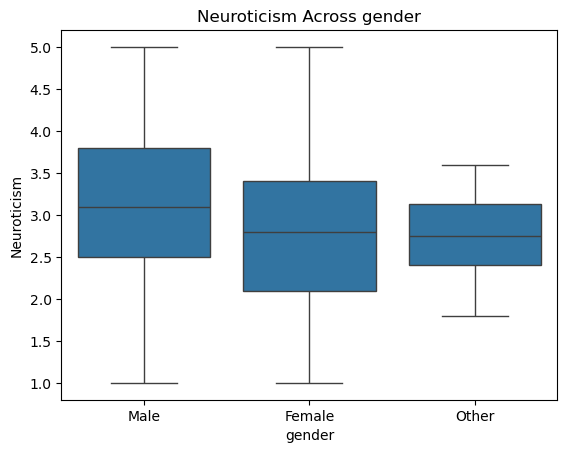

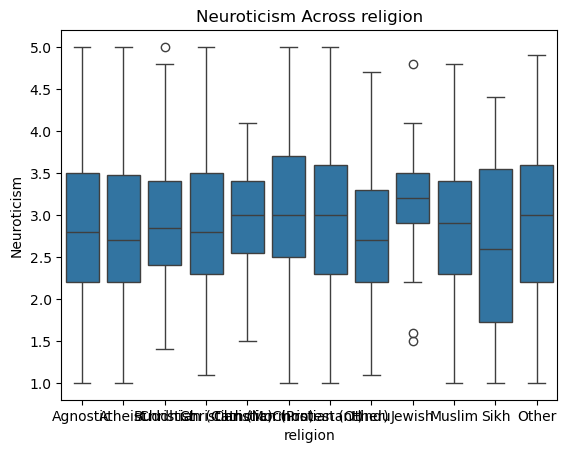

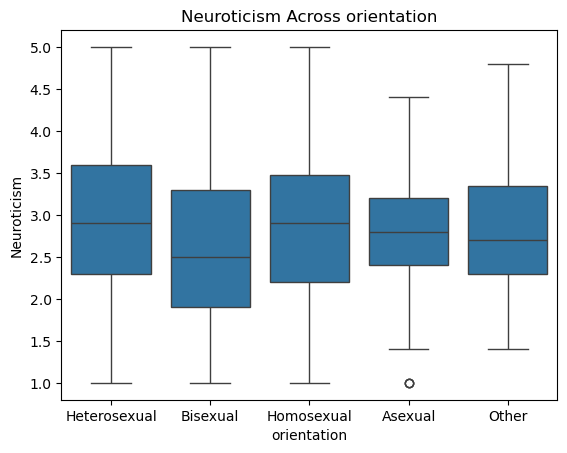

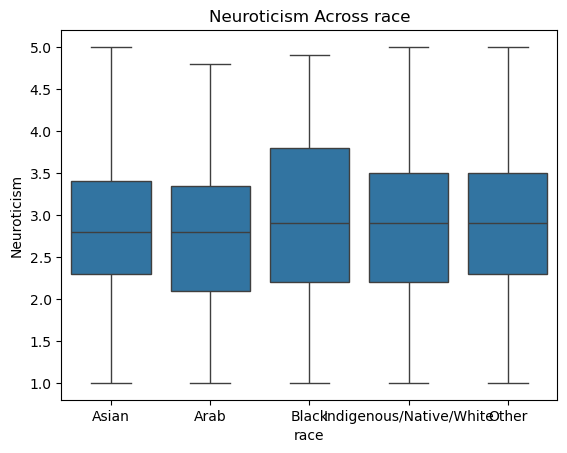

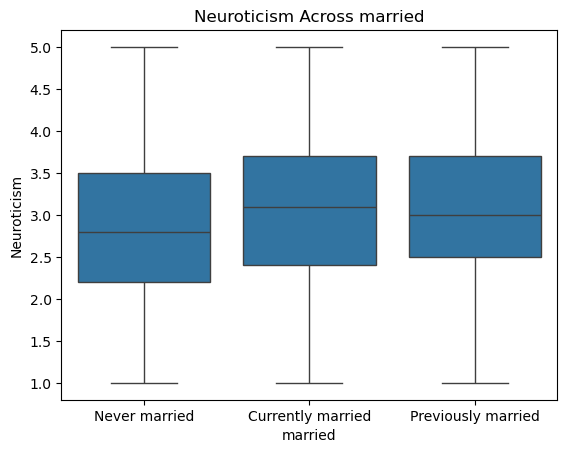

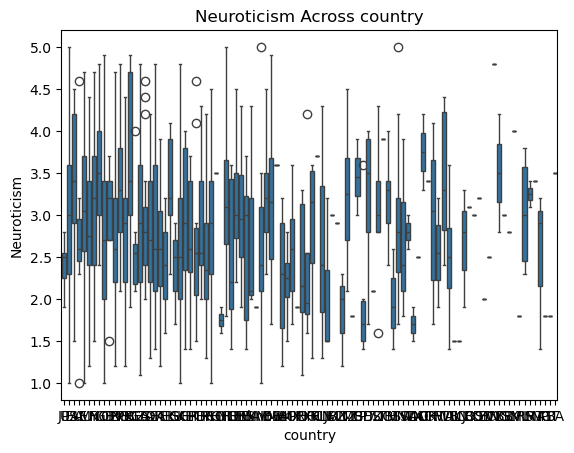

In [73]:
for i in demographics:
    sns.boxplot(x=i, y='Agreeableness', data=df_)
    plt.title(f"Agreeableness Across {i}")
    plt.show()

for i in demographics:
    sns.boxplot(x=i, y='Neuroticism', data=df_)
    plt.title(f"Neuroticism Across {i}")
    plt.show()

### Saving the cleaned dataset

In [74]:
df.head()

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,operatingsystem,browser,introelapse,testelapse,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness,Grit
4,JP,340,5,2,3,3,2,4,2,4,...,Windows,Firefox,3,337,1.2,2.5,3.3,3.8,3.0,3.083333
6,US,126,4,1,3,2,1,5,1,1,...,Windows,Chrome,36,212,4.0,2.0,3.6,3.4,5.0,2.583333
8,EU,130,5,3,3,5,4,5,5,4,...,Windows,Microsoft Internet Explorer,14,183,4.4,4.5,4.7,4.0,4.3,4.250000
10,AE,592,5,3,3,2,4,3,3,3,...,Windows,Chrome,726,311,3.0,4.6,3.6,3.8,3.4,3.166667
11,AU,217,3,1,1,2,1,3,1,2,...,Windows,Firefox,376,407,2.0,1.1,3.4,3.9,4.4,2.000000


In [77]:
df.reset_index(inplace=True)
df.to_csv('./data/cleaned_grit_data.csv', index=False)

### Analyzing vocabulary knowledge to grit

In [162]:
vocabulary_col = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5',
 'VCL7', 'VCL8', 'VCL10', 'VCL11', 'VCL13',
 'VCL14', 'VCL15', 'VCL16']

df[vocabulary_col].head()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL7,VCL8,VCL10,VCL11,VCL13,VCL14,VCL15,VCL16
0,0,0,0,1,0,0,0,1,0,0,0,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,0,1,1,1,1,1,1,1
3,1,0,0,1,1,0,0,1,0,0,1,0,1
4,1,1,0,0,1,0,0,1,0,0,1,1,1


In [163]:

for col in vocabulary_col:
    print(f"{col} Distribution:")
    print(df[col].value_counts(normalize=True) * 100)
    print("\n")

VCL1 Distribution:
VCL1
1    92.954545
0     7.045455
Name: proportion, dtype: float64


VCL2 Distribution:
VCL2
1    84.0
0    16.0
Name: proportion, dtype: float64


VCL3 Distribution:
VCL3
0    69.136364
1    30.863636
Name: proportion, dtype: float64


VCL4 Distribution:
VCL4
1    93.590909
0     6.409091
Name: proportion, dtype: float64


VCL5 Distribution:
VCL5
1    87.772727
0    12.227273
Name: proportion, dtype: float64


VCL7 Distribution:
VCL7
0    84.363636
1    15.636364
Name: proportion, dtype: float64


VCL8 Distribution:
VCL8
0    69.590909
1    30.409091
Name: proportion, dtype: float64


VCL10 Distribution:
VCL10
1    95.727273
0     4.272727
Name: proportion, dtype: float64


VCL11 Distribution:
VCL11
0    85.909091
1    14.090909
Name: proportion, dtype: float64


VCL13 Distribution:
VCL13
1    51.454545
0    48.545455
Name: proportion, dtype: float64


VCL14 Distribution:
VCL14
1    76.772727
0    23.227273
Name: proportion, dtype: float64


VCL15 Distribution:
VCL

In [166]:
df['vocab_score'] = df[vocabulary_col].sum(axis=1)

df.groupby('vocab_score')['Grit'].mean()

vocab_score
0     3.526316
1     3.034314
2     3.261905
3     3.416667
4     3.107639
5     3.189542
6     3.192361
7     3.167472
8     3.347443
9     3.266117
10    3.284623
11    3.278164
12    3.327295
13    3.276961
Name: Grit, dtype: float64

Grit scores showed minor variation across vocabulary knowledge levels. Participants who claimed to know more words exhibited slightly higher grit, but the trend was not strongly linear. Notably, participants with zero recognized words had surprisingly high grit, suggesting possible cautious response behavior.

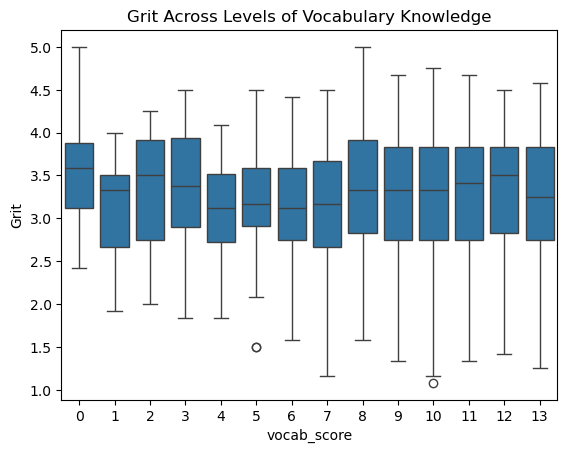

In [168]:
sns.boxplot(x='vocab_score', y='Grit', data=df)
plt.title("Grit Across Levels of Vocabulary Knowledge")
plt.show()

In [1]:
df.head()

NameError: name 'df' is not defined